In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading CSV files
inp1= pd.read_csv('application_data.csv')
inp2= pd.read_csv('previous_application.csv')

In [3]:
#Checking data in inp1 and inp2

In [4]:
inp1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Here the column which we will mainly focus is the TARGET column, as TARGET column describes whether the customer defaulted or paid the amount successfully on time

In [5]:
inp2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Here the column which we will be mainly interested in is the NAME_CONTRACT_STATUS which tells us whether the previous loan was approved, canceled, refused or unused offer

In [6]:
#Checking shape of data in inp1 and inp2

In [7]:
inp1.shape

(307511, 122)

In [8]:
inp2.shape

(1670214, 37)

In [9]:
#Checking description of inp1 and inp2

In [10]:
inp1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [11]:
inp2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### We will assume the thershold of missing data at 40 percent; so we will remove all the columns which have more than 40 percent missing data

In [12]:
missing_columns= inp1.isnull().sum()/inp1.shape[0]*100
dropped_columns= missing_columns[missing_columns>=40]
print(dropped_columns)
print(dropped_columns.shape)

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [13]:
#Dropping the above mentioned 49 columns
inp1.drop(columns=dropped_columns.index,inplace=True)

In [14]:
#Checking the shape of data
inp1.shape

(307511, 73)

### Flag Document columns do not provide any insigts so we will remove those columns

In [15]:
Flag_Docs= ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
            'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
            'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
            'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
inp1.drop(columns=Flag_Docs, inplace= True)

In [16]:
inp1.shape

(307511, 53)

In [17]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [18]:
#Checking the missing values for all columns
inp1.isnull().sum()/inp1.shape[0]*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

From above we can observe that OCCUPATION_TYPE, EXT_SOURCE_3, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT and AMT_REQ_CREDIT_BUREAU_YEAR have more than 10 percent missing values so we will further look into these columns to check how we can impute this missing data

##### Analyzing EXT_SOURCE_3 column

In [19]:
inp1.EXT_SOURCE_3.nunique()

814

In [20]:
inp1.EXT_SOURCE_3.value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

##### SInce there are no outliers and the data present in EXT_SOURCE_3 column is continuous so we can impute the missing values with the mean value

In [21]:
inp1.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

So we can impute the missing data with 0.51 for EXT_SOURCE_3 column

#### Analyzing OCCUPATION_TYPE column

In [22]:
inp1.OCCUPATION_TYPE.nunique()

18

In [23]:
inp1.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

OCCUPATION_TYPE column is categorical column so we can impute the missing values with the mode. Hence, we can impute the missing values in OCCUPATION_TYPE column with "Laborers"

#### Anazlyzing AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT and AMT_REQ_CREDIT_BUREAU_YEAR columns


In [24]:
inp1.AMT_REQ_CREDIT_BUREAU_HOUR.nunique()

5

In [25]:
inp1.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [26]:
inp1.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

**AMT_REQ_CREDIT_BUREAU_HOUR** is a categorical column, so we can impute the missing values with the mode value which is 0

In [27]:
inp1.AMT_REQ_CREDIT_BUREAU_DAY.nunique()

9

In [28]:
inp1.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [29]:
inp1.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

**AMT_REQ_CREDIT_BUREAU_DAY** is a categorical column, so we can impute the missing values with the mode value which is 0

In [30]:
inp1.AMT_REQ_CREDIT_BUREAU_WEEK.nunique()

9

In [31]:
inp1.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [32]:
inp1.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

**AMT_REQ_CREDIT_BUREAU_WEEK** is a categorical column, so we can impute the missing values with the mode value which is 0

In [33]:
inp1.AMT_REQ_CREDIT_BUREAU_MON.nunique()

24

In [34]:
inp1.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [35]:
inp1.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

**AMT_REQ_CREDIT_BUREAU_MON** is a categorical column, so we can impute the missing values with the mode value which is 0

In [36]:
inp1.AMT_REQ_CREDIT_BUREAU_QRT.nunique()

11

In [37]:
inp1.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [38]:
inp1.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

**AMT_REQ_CREDIT_BUREAU_QRT** is a categorical column, so we can impute the missing values with the mode value which is 0

In [39]:
inp1.AMT_REQ_CREDIT_BUREAU_YEAR.nunique()

25

In [40]:
inp1.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [41]:
inp1.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

**AMT_REQ_CREDIT_BUREAU_YEAR** is a categorical column, so we can impute the missing values with the mode value which is 0

### Removing columns which do not help in providing insights to our analysis

In [42]:
cols=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
      'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
      'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
      'WEEKDAY_APPR_PROCESS_START']
inp1.drop(columns=cols,inplace=True)

In [43]:
inp1.shape

(307511, 37)

## Removing columns with more than 40 percent missing values

In [44]:
inp2.isnull().sum()/inp2.shape[0]*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [45]:
missing_columns_2= inp2.isnull().sum()/inp2.shape[0]*100
dropped_columns_2= missing_columns_2[missing_columns_2>=40]
print(dropped_columns_2)
print(dropped_columns_2.shape)

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64
(11,)


In [46]:
#Dropping the above mentioned 11 columns
inp2.drop(columns=dropped_columns_2.index,inplace=True)

In [47]:
inp2.shape

(1670214, 26)

In [48]:
inp2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


In [49]:
#Dropping columns that do not not help us with our analysis
cols=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','SK_ID_PREV']
inp2.drop(columns=cols,inplace=True)

In [50]:
inp2.shape

(1670214, 23)

In [51]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1670214 non-null  int64  
 1   NAME_CONTRACT_TYPE           1670214 non-null  object 
 2   AMT_ANNUITY                  1297979 non-null  float64
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   AMT_GOODS_PRICE              1284699 non-null  float64
 6   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 7   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 8   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 9   NAME_CONTRACT_STATUS         1670214 non-null  object 
 10  DAYS_DECISION                1670214 non-null  int64  
 11  NAME_PAYMENT_TYPE            1670214 non-null  object 
 12  CODE_REJECT_REASON           1670214 non-n

In [52]:
#checking all the columns for missing values
inp2.isnull().sum()/inp2.shape[0]*100

SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP                0.000000
PRODUCT_COMBINATION             0.020716
dtype: float64

In [53]:
inp2.AMT_ANNUITY.nunique()

357959

In [54]:
inp2.AMT_ANNUITY.value_counts()

2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
3794.445         1
8723.160         1
27948.330        1
25374.285        1
14704.290        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

In [55]:
inp2.AMT_ANNUITY.mean()

15955.120659452119

**AMT_ANNUITY** contains continuous values so we can impute the missing data with the mean of AMT_ANNUITY which is 15955.120

In [56]:
inp2.AMT_GOODS_PRICE.nunique()

93885

In [57]:
inp2.AMT_GOODS_PRICE.value_counts()

45000.00     47831
225000.00    43549
135000.00    40666
450000.00    38926
90000.00     29367
             ...  
185292.00        1
225054.00        1
156212.55        1
99896.31         1
267295.50        1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

In [58]:
inp2.AMT_GOODS_PRICE.mean()

227847.27928334562

**AMT_GOODS_PRICE** contains continuous values so we can impute the missing data with the mean value which is 227847.27

In [59]:
inp2.CNT_PAYMENT.nunique()

49

In [60]:
inp2.CNT_PAYMENT.value_counts()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
28.0         8
29.0         8
32.0         6
19.0         6
34.0         4
59.0         4
41.0         3
47.0         3
45.0         3
21.0         3
44.0         2
39.0         2
46.0         2
38.0         2
33.0         1
40.0         1
53.0         1
Name: CNT_PAYMENT, dtype: int64

In [61]:
inp2.CNT_PAYMENT.mode()

0    12.0
Name: CNT_PAYMENT, dtype: float64

**CNT_PAYMENT** contains categorical values so we can impute the missing data with the mode, which is 12

## Performing Sanity Checks

In [62]:
#Checking GENDER_CODE column as it has 3 values
inp1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [63]:
inp1[inp1.CODE_GENDER=='XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,7.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,10.0,4.0,10.0,4.0,0.0,0.0,0.0,0.0,1.0,6.0


In [64]:
#Since GENDER_CODE is a categorical column so we can impute XNA with 'F' which is the mode or we can drop these rows
inp1= inp1[~(inp1.CODE_GENDER=='XNA')]

In [65]:
inp1.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

#### DAYS_BIRTH and DAYS_EMPLOYED contains negative values, so we will convert them to positive. Also instead of days we will use years for birth column

In [66]:
inp1.DAYS_BIRTH.describe()

count    307507.000000
mean     -16037.027271
std        4363.982424
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [67]:
#Converting negative values to positive
inp1.DAYS_BIRTH = inp1.DAYS_BIRTH.abs()

In [68]:
inp1.DAYS_BIRTH.describe()

count    307507.000000
mean      16037.027271
std        4363.982424
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [69]:
#Converting Days_Birth to Years_Birth
inp1['YEARS_BIRTH']= inp1.DAYS_BIRTH/365

In [70]:
inp1.YEARS_BIRTH.describe()

count    307507.000000
mean         43.937061
std          11.956116
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEARS_BIRTH, dtype: float64

In [71]:
#Since we have converted days to years for Birth column so we can drop the days column now
inp1.drop(columns=['DAYS_BIRTH'],inplace=True)

In [72]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307507 non-null  int64  
 1   TARGET                      307507 non-null  int64  
 2   NAME_CONTRACT_TYPE          307507 non-null  object 
 3   CODE_GENDER                 307507 non-null  object 
 4   FLAG_OWN_CAR                307507 non-null  object 
 5   FLAG_OWN_REALTY             307507 non-null  object 
 6   CNT_CHILDREN                307507 non-null  int64  
 7   AMT_INCOME_TOTAL            307507 non-null  float64
 8   AMT_CREDIT                  307507 non-null  float64
 9   AMT_ANNUITY                 307495 non-null  float64
 10  AMT_GOODS_PRICE             307229 non-null  float64
 11  NAME_TYPE_SUITE             306215 non-null  object 
 12  NAME_INCOME_TYPE            307507 non-null  object 
 13  NAME_EDUCATION

In [73]:
inp1.DAYS_EMPLOYED=inp1.DAYS_EMPLOYED.abs()
inp1.DAYS_EMPLOYED.describe()

count    307507.000000
mean      67725.569893
std      139444.469301
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

# Identifying Data Imbalance

### For application_data

In [74]:
inp1.TARGET.value_counts(normalize=True)

0    0.91927
1    0.08073
Name: TARGET, dtype: float64

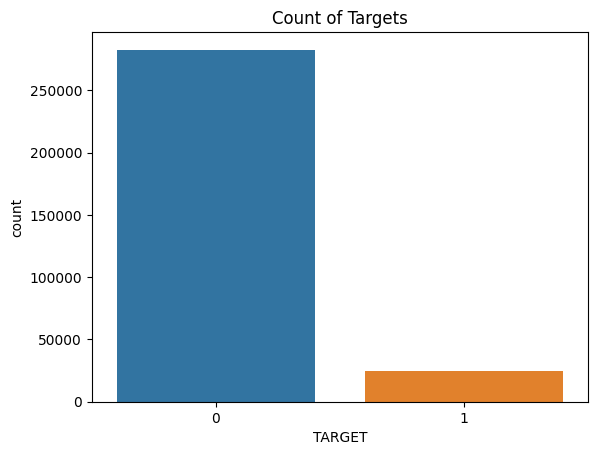

In [75]:
sns.countplot(data=inp1,x='TARGET')
plt.title('Count of Targets')
plt.show()

By observing the above data we can confirm that the data set given to us is highly imbalanced, as there is more data for successful loan payments as compared to unsuccessful loan payments

### For Previous_application

In [76]:
inp2.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

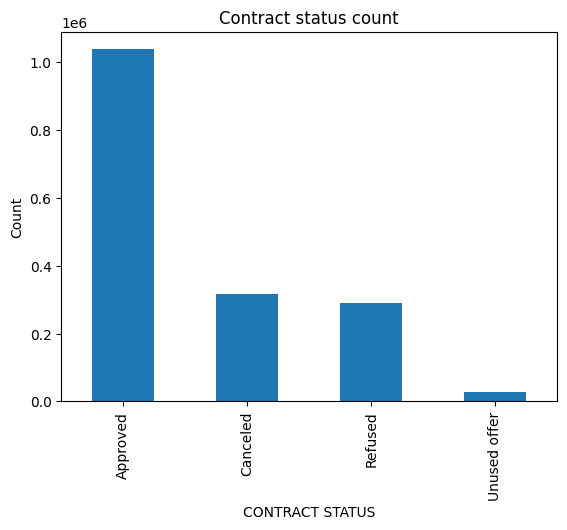

In [77]:
inp2.NAME_CONTRACT_STATUS.value_counts().plot.bar()
plt.xlabel('CONTRACT STATUS')
plt.ylabel('Count')
plt.title('Contract status count')
plt.show()

In Previous application dataset also we can observe that there is some data imbalance present as around 60 percent of data given to us is for approved applications

## Checking for outliers and ananlysing application data

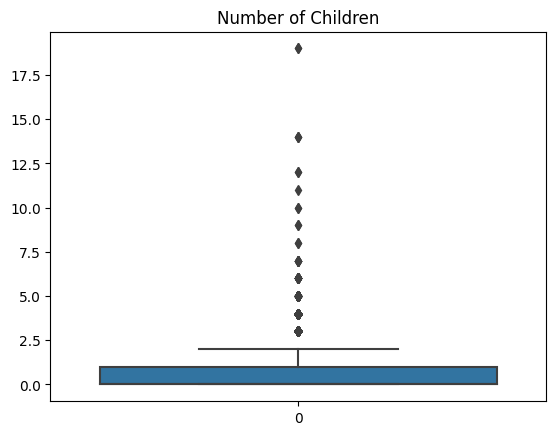

In [78]:
#CNT_CHILDREN column
sns.boxplot(inp1.CNT_CHILDREN)
plt.title('Number of Children')
plt.show()

For above we can conclude that-

1) Most of the customer who apply for loans have less than 2 children

2) There are some outliers present in this column 

3) Since there are outliers so we can impute them with the median value

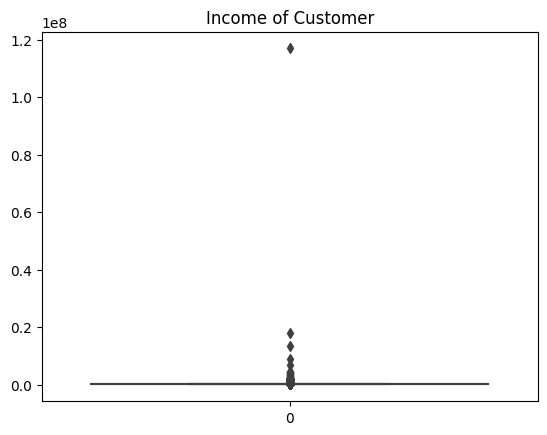

In [79]:
#AMT_INCOME_TOTAL
sns.boxplot(inp1.AMT_INCOME_TOTAL)
plt.title('Income of Customer')
plt.show()

From above we can conclude that-

1) The maximum value of salary is very high as compared to the normal incomes

2) There are outliers present in the data

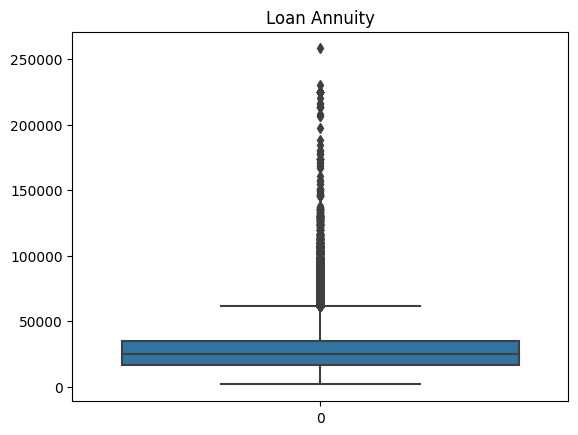

In [80]:
# AMT_ANNUITY
sns.boxplot(inp1.AMT_ANNUITY)
plt.title('Loan Annuity')
plt.show()

From above we can conclude that-

1) The maximum loan annuity is higher as compared to the normal loan annuity amount

2) There are outliers present in the data

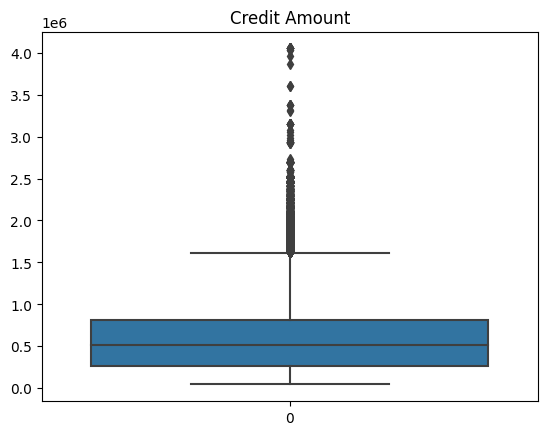

In [81]:
#Analyzing AMT_CREDIT column
sns.boxplot(inp1.AMT_CREDIT)
plt.title('Credit Amount')
plt.show()

From above we conclude that-

1) The maximum credit amount is higher than the normal credit amount

2) There are outliers present in the data

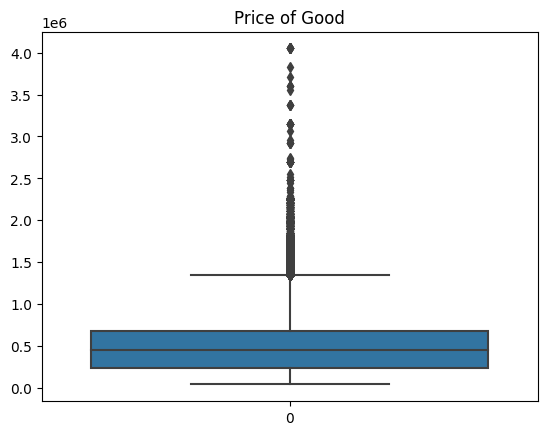

In [82]:
#AMT_GOODS_PRICE
sns.boxplot(inp1.AMT_GOODS_PRICE)
plt.title('Price of Good')
plt.show()

From above we can conclude that-

1) The price of the maximum good is greater than the normal price of the goods

2) There are outliers present in the data

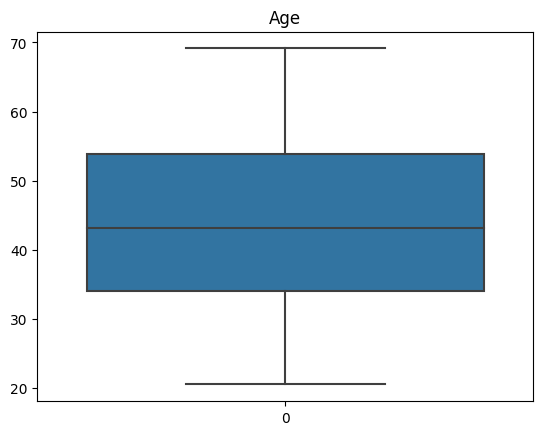

In [83]:
#Analyzing YEARS_BIRTH column
sns.boxplot(inp1.YEARS_BIRTH)
plt.title('Age')
plt.show()

From above we can conclude that-

1) Major customers are from the age group of around 20-70

2) There are no outliers present in the data

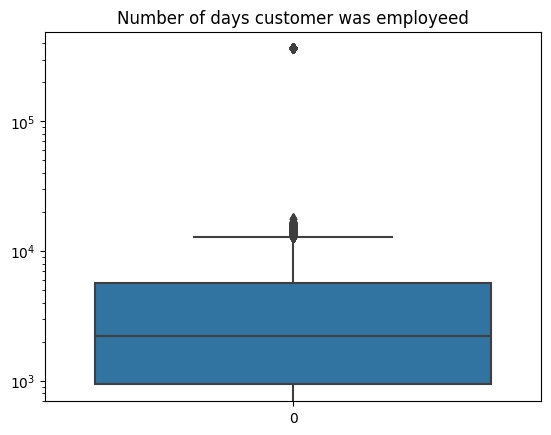

In [84]:
#Analyzing DAYS_EMPLOYED column
sns.boxplot(inp1.DAYS_EMPLOYED)
plt.title('Number of days customer was employeed')
plt.yscale('log')
plt.show()

From above we can conclude that-

1) The highest value present is 1,00,000 which is not possible

2) There are outliers present in the data

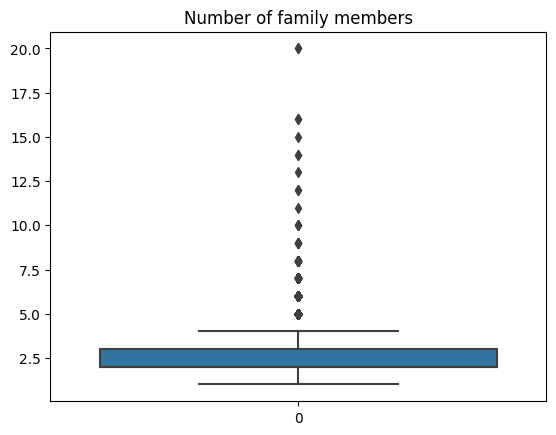

In [85]:
#CNT_FAM_MEMBERS
sns.boxplot(inp1.CNT_FAM_MEMBERS)
plt.title('Number of family members')
plt.show()

From above we can observe- 

1) The maximum number of family members which a customer has is around 20

2) There are outliers present in the data

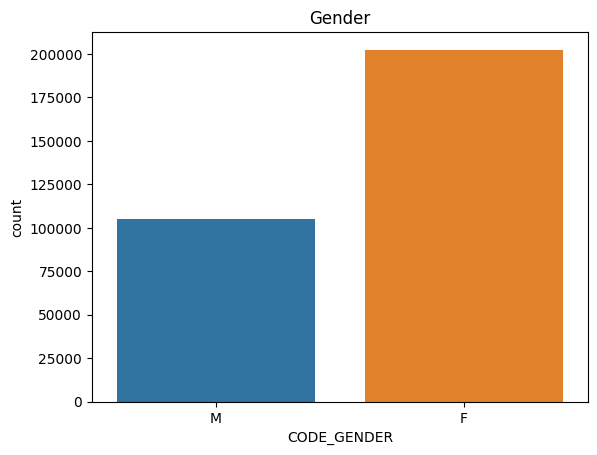

In [86]:
sns.countplot(data=inp1, x='CODE_GENDER')
plt.title('Gender')
plt.show()

From above we observe the following-

1) More number of females have applied for loans as compared to males

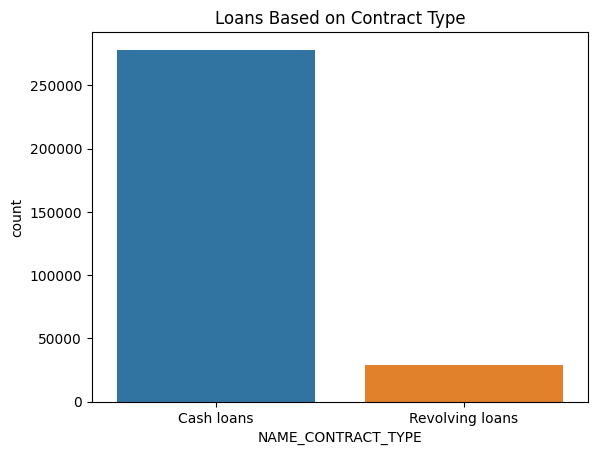

In [87]:
sns.countplot(data=inp1,x='NAME_CONTRACT_TYPE')
plt.title('Loans Based on Contract Type')
plt.show()

From above we can observe-

1) More number of customers have taken cash loans

2) Very less number of customer take revolving loans as compared to cash loans

In [88]:
#Function to create vertical count plots

In [89]:
def vert_plot(data,x,title,hue='TARGET',scale='linear'):
    sns.countplot(data=data,x=x,hue=hue)
    plt.yscale(scale)
    plt.title(title)
    plt.xticks(rotation=75)
    plt.show()

In [90]:
#Function to create horizontal count plots

In [91]:
def h_plot(data,y,title,hue='TARGET',scale='linear'):
    sns.countplot(data=data,y=y,hue=hue)
    plt.xscale(scale)
    plt.title(title)
    plt.show()

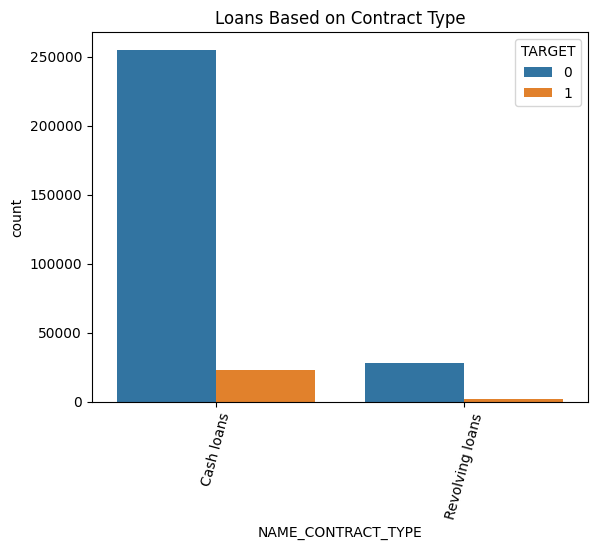

In [92]:
vert_plot(inp1,'NAME_CONTRACT_TYPE','Loans Based on Contract Type')

From above we can observe that-

1) Majority of loans are cash loans

2) Very few revolving loans are taken as compared to cash loans

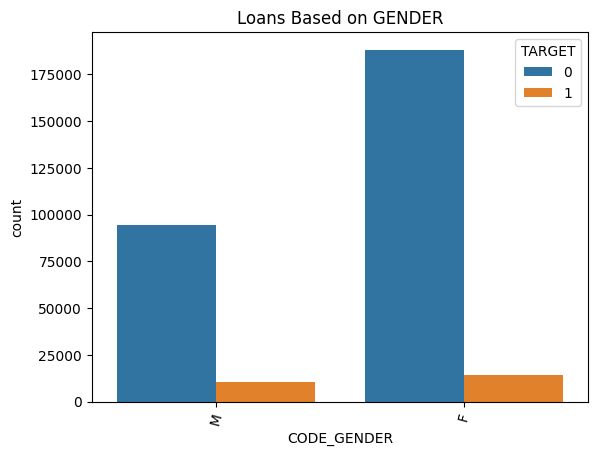

In [93]:
vert_plot(inp1,'CODE_GENDER','Loans Based on GENDER')

From above we can observe-

1) Females take more number of loans

2) Females have less percentage of unsuccessful loan payments as compared to males

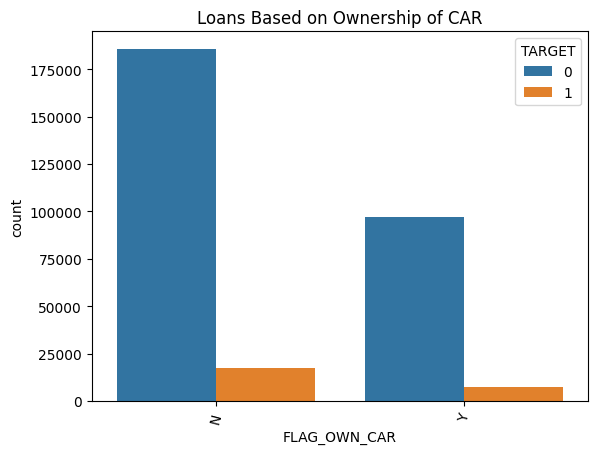

In [94]:
vert_plot(inp1,'FLAG_OWN_CAR','Loans Based on Ownership of CAR')

From above we can observe-

1) Customers who don't own a car, usually take more number of loans

2) Customers with no cars have less percent of unsuccessful payments compared to the customers who have cars

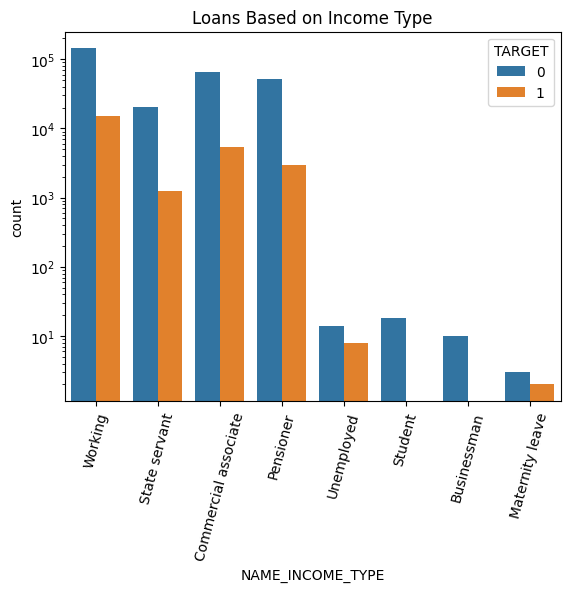

In [95]:
vert_plot(inp1,'NAME_INCOME_TYPE','Loans Based on Income Type',scale='log')

From above we can observe the following-

1) Working professionals take more number of loans and have the maximum unsuccessful payments

2) Students and businessman take less loans but have very less loans with unsucessful loan payments

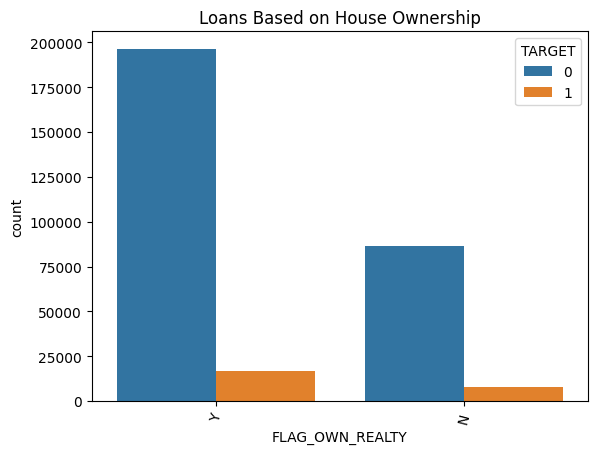

In [96]:
vert_plot(inp1,'FLAG_OWN_REALTY','Loans Based on House Ownership')

Customers who own some kind of real estate usually take more number of loans and have more successful loan payments as compared to the customers to do not own any real estate

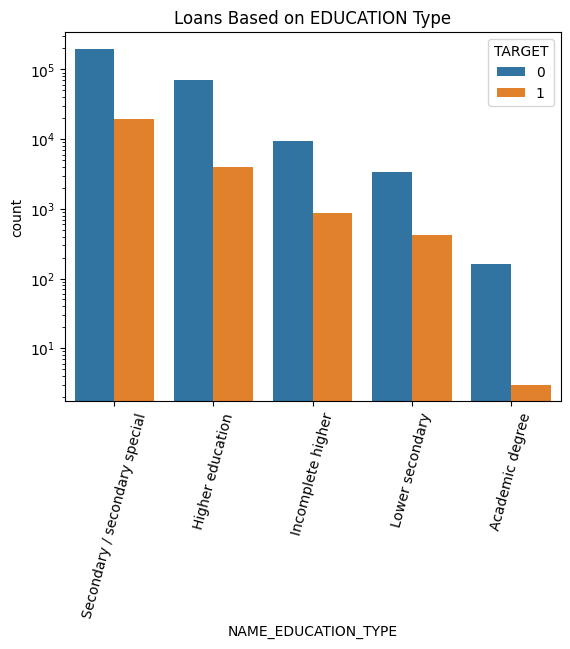

In [97]:
vert_plot(inp1,'NAME_EDUCATION_TYPE','Loans Based on EDUCATION Type',scale='log')

Customers who have secondary/secondary special level education take more number of loans but they also have the highest number of unsuccessful loan payments. Whereas customers with academic degree have the least number of unsuccessful loan payments

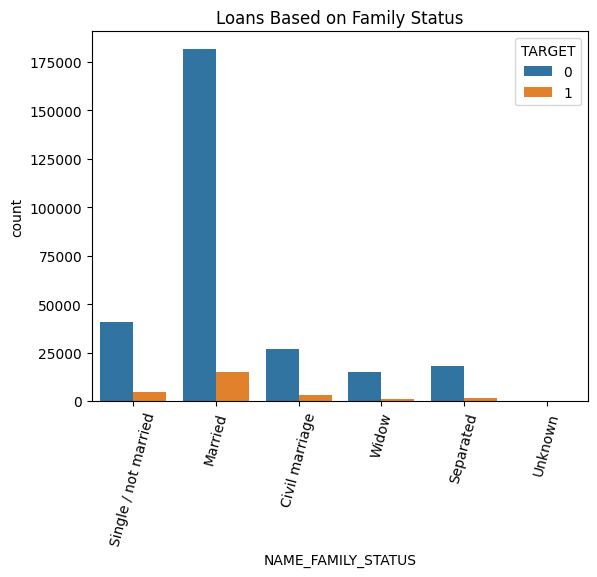

In [98]:
vert_plot(inp1,'NAME_FAMILY_STATUS','Loans Based on Family Status')

From above we can observe that-

1) Married customers take more number of loans

2) Widows take the least loans

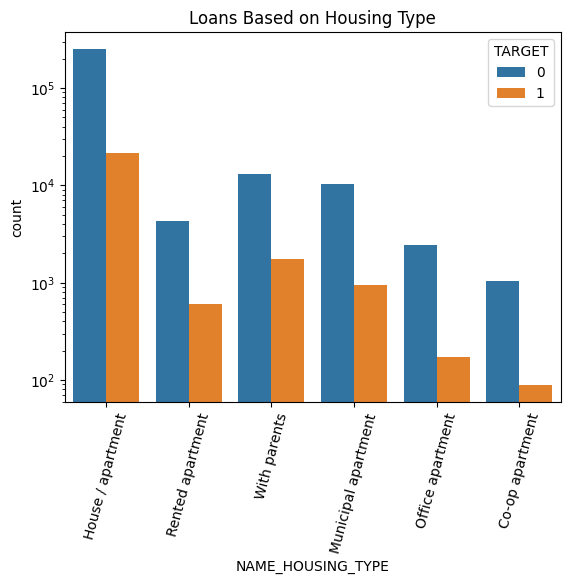

In [99]:
vert_plot(inp1,'NAME_HOUSING_TYPE','Loans Based on Housing Type',scale='log')

From above we can observe we can observe that-

1) People who live in a house/apartment or live with their parents take the most number of loans

2) People who live in co-op appartments take the least number of loans

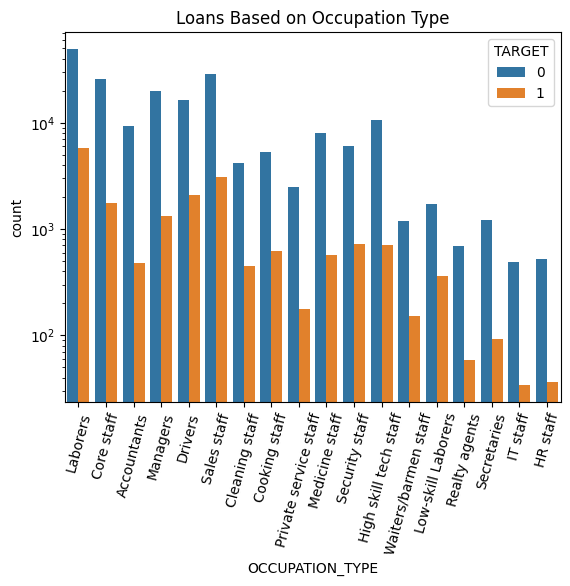

In [100]:
vert_plot(inp1,'OCCUPATION_TYPE','Loans Based on Occupation Type',scale='log')

Customers whose occupation is laborers tend to take more loans and have higher number of unsuccessful loans. Whereas people working as IT staff and HR staff have the least number of unsuccessful number of loans

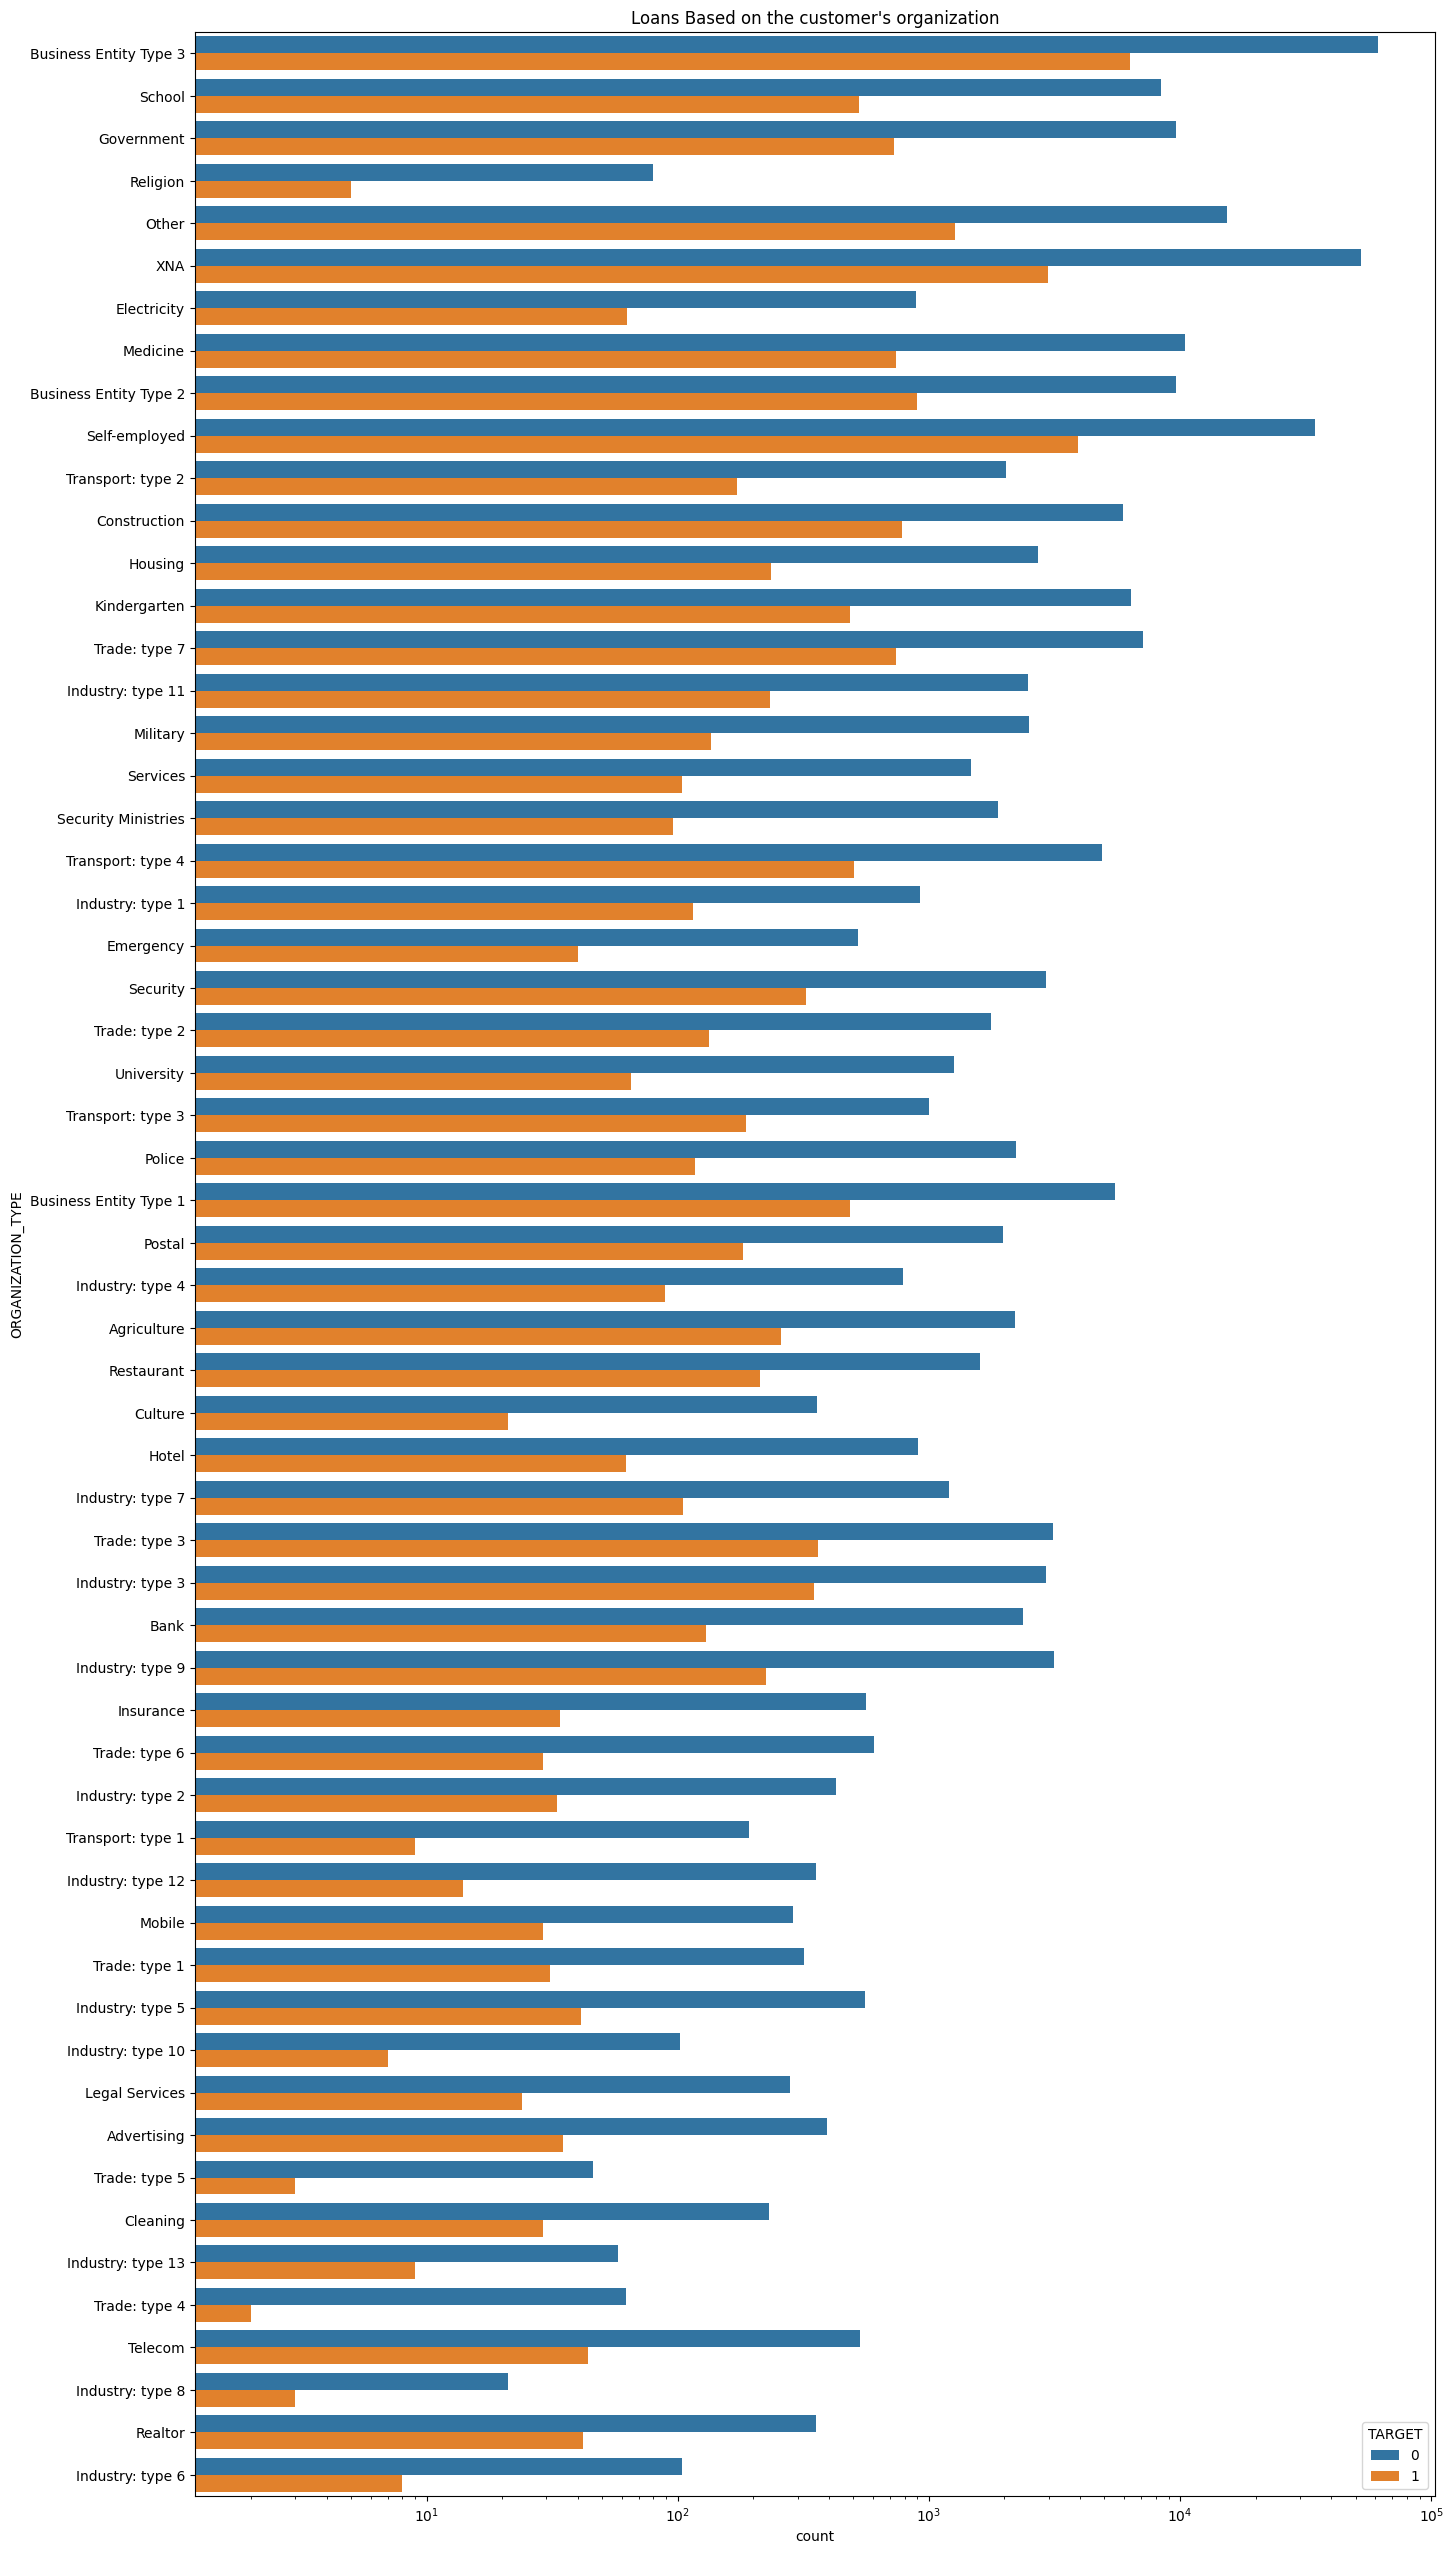

In [101]:
plt.figure(figsize=(16,32))
h_plot(inp1,'ORGANIZATION_TYPE',"Loans Based on the customer's organization",scale='log')

From above we can observe that-

1) Customers who work in an Business Entry type 3 organization take the most number of loans

2) Customers who work in industry type 8 take the least number of loans

3) Customers working in Business Entry type 3 organization and those who are self employeed have the highest number of defaults

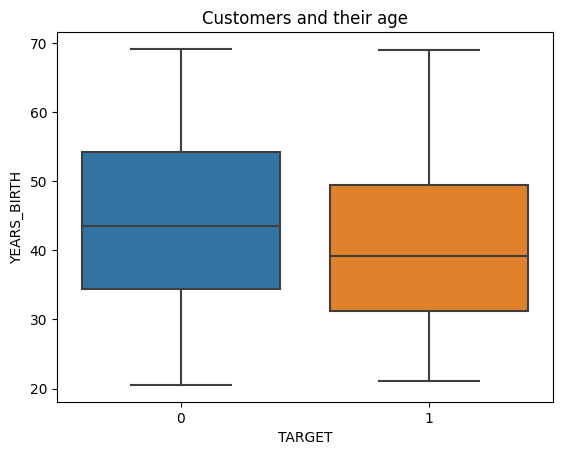

In [102]:
sns.boxplot(data=inp1,x='TARGET',y='YEARS_BIRTH')
plt.title('Customers and their age')
plt.show()

The average age of customers who successfully pay their loans is higher as compared to the average age of the customers who have unsuccessful loan payments

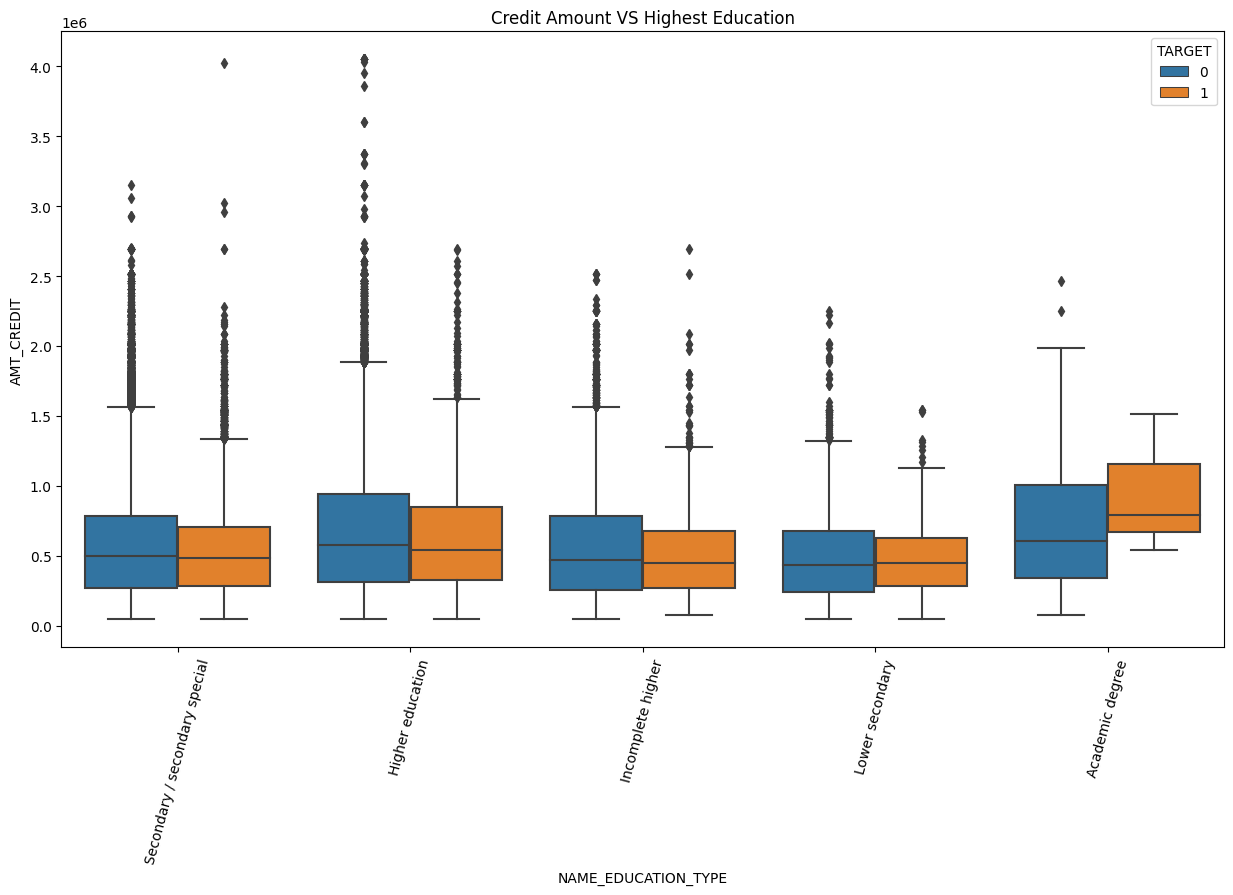

In [103]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=75)
sns.boxplot(data =inp1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='TARGET')
plt.title('Credit Amount VS Highest Education')
plt.show()

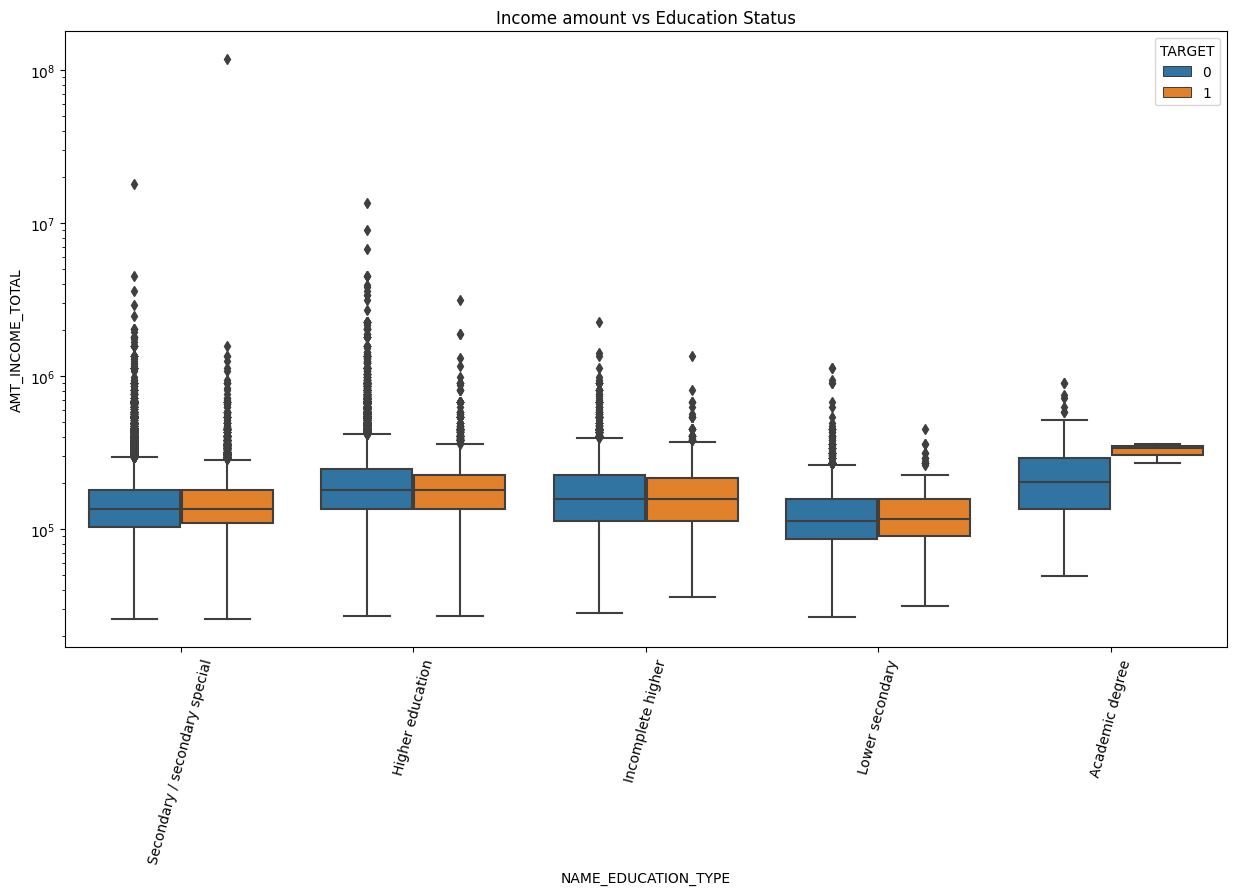

In [104]:
plt.figure(figsize=(15,8))
sns.boxplot(data =inp1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='TARGET')
plt.title('Income amount vs Education Status')
plt.xticks(rotation=75)
plt.yscale('log')
plt.show()

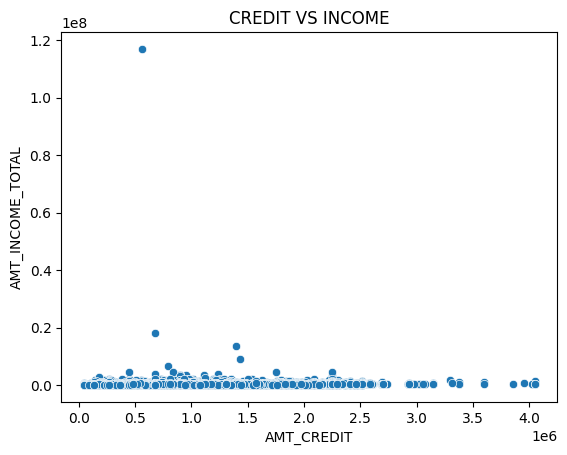

In [105]:
sns.scatterplot(data=inp1, y='AMT_INCOME_TOTAL',x='AMT_CREDIT')
plt.title('CREDIT VS INCOME')
plt.show()

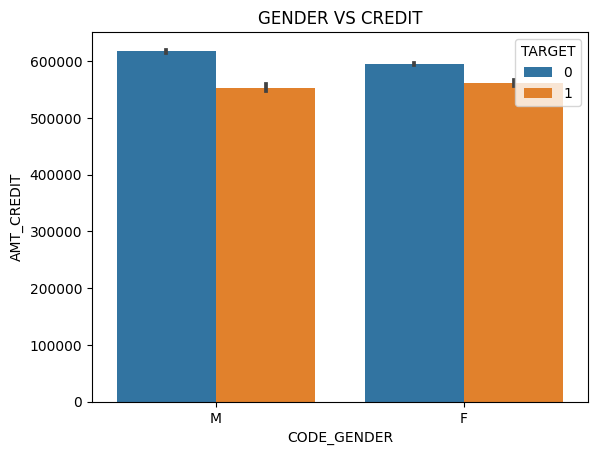

In [106]:
sns.barplot(data=inp1,x='CODE_GENDER',y='AMT_CREDIT',hue='TARGET')
plt.title('GENDER VS CREDIT')
plt.show()

The credit amount taken by males is higher than the credit amount taken by females

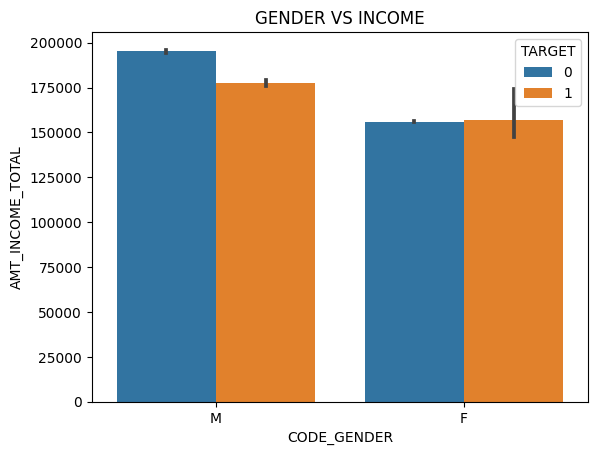

In [107]:
sns.barplot(data=inp1,x='CODE_GENDER',y='AMT_INCOME_TOTAL',hue='TARGET')
plt.title('GENDER VS INCOME')
plt.show()

From above we can observe that-

1) Males who earn more have less issues with loan payments

2) Females who earn more have sighly more issues with loan payments as compared to females who earn less

### Creating bins for  AMT_CREDIT and AMT_INCOME_TOTAL

To analyze AMT_CREDIT and AMT_INCOME_TOTAL columns in graphs we need to bin them in some categories 

In [108]:
inp1[['AMT_CREDIT','AMT_INCOME_TOTAL']].describe()

,AMT_CREDIT,AMT_INCOME_TOTAL
count,3.075070e+05,3.075070e+05
mean,5.990286e+05,1.687977e+05
std,4.024926e+05,2.371246e+05
min,4.500000e+04,2.565000e+04
25%,2.700000e+05,1.125000e+05
50%,5.135310e+05,1.471500e+05
75%,8.086500e+05,2.025000e+05
max,4.050000e+06,1.170000e+08


In [109]:
bins=[0,250000,500000,750000,1000000, 1250000, 1500000, 1750000, 2000000, 2250000,2500000,2750000,3000000,3250000,
      3500000,3750000,4000000,999999999]

In [110]:
labels=['0-250000','250000-500000','500000-750000','750000-1000000', '1000000-1250000','1250000-1500000','1500000-1750000',
        '1750000-2000000','2000000-2250000','2250000-2500000','2500000-2750000','2750000-3000000','3000000-3250000',
        '3250000-3500000','3500000-3750000','3750000-4000000','4000000 +']

In [111]:
inp1['AMT_INCOME_TOTAL_RANGE']=pd.cut(inp1.AMT_INCOME_TOTAL,bins=bins,labels=labels)

In [112]:
inp1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,AMT_INCOME_TOTAL_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,0-250000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,250000-500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0-250000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,52.068493,0-250000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,0-250000


In [113]:
credit_bins=[0,250000,500000,750000,1000000, 1250000, 1500000, 1750000, 2000000, 2250000,2500000,2750000,3000000,3250000,
      3500000,3750000,4000000,4250000,4500000,999000000]

In [114]:
credit_labels=['0-250000','250000-500000','500000-750000','750000-1000000', '1000000-1250000','1250000-1500000','1500000-1750000',
        '1750000-2000000','2000000-2250000','2250000-2500000','2500000-2750000','2750000-3000000','3000000-3250000',
        '3250000-3500000','3500000-3750000','3750000-4000000','4000000-4250000','4250000-4500000','4500000 +']

In [115]:
inp1['AMT_CREDIT_RANGE']=pd.cut(inp1.AMT_CREDIT,bins=credit_bins,labels=credit_labels)

In [116]:
inp1.AMT_INCOME_TOTAL_RANGE.value_counts(normalize=True).sort_values(ascending=False)

0-250000           0.870644
250000-500000      0.120570
500000-750000      0.006693
750000-1000000     0.001281
1000000-1250000    0.000322
1250000-1500000    0.000218
2000000-2250000    0.000078
1500000-1750000    0.000065
1750000-2000000    0.000065
4000000 +          0.000029
3000000-3250000    0.000007
3250000-3500000    0.000007
3500000-3750000    0.000007
3750000-4000000    0.000007
2250000-2500000    0.000003
2500000-2750000    0.000003
2750000-3000000    0.000003
Name: AMT_INCOME_TOTAL_RANGE, dtype: float64

In [117]:
inp1.AMT_CREDIT_RANGE.value_counts(normalize=True).sort_values(ascending=False)

250000-500000      0.293106
500000-750000      0.211680
0-250000           0.192509
750000-1000000     0.140156
1000000-1250000    0.081543
1250000-1500000    0.046028
1500000-1750000    0.018348
1750000-2000000    0.010032
2000000-2250000    0.004592
2500000-2750000    0.001034
2250000-2500000    0.000833
3000000-3250000    0.000039
2750000-3000000    0.000036
4000000-4250000    0.000033
3250000-3500000    0.000020
3500000-3750000    0.000007
3750000-4000000    0.000007
4250000-4500000    0.000000
4500000 +          0.000000
Name: AMT_CREDIT_RANGE, dtype: float64

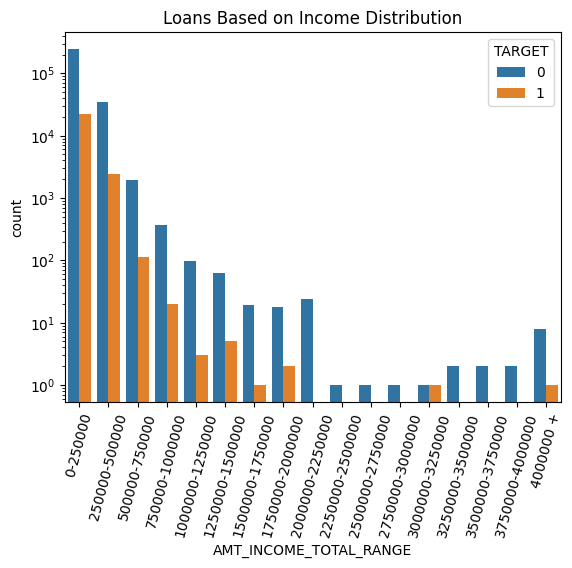

In [118]:
vert_plot(inp1,'AMT_INCOME_TOTAL_RANGE','Loans Based on Income Distribution',scale='log')

From above we can observe that customers with income in range of 2000000 - 2750000 and 3000000 - 4000000 usually repay their loans successfully, where as customers with income in range of 0 - 250000 take highest number of loans but they also have the highest unsuccessful loan payments

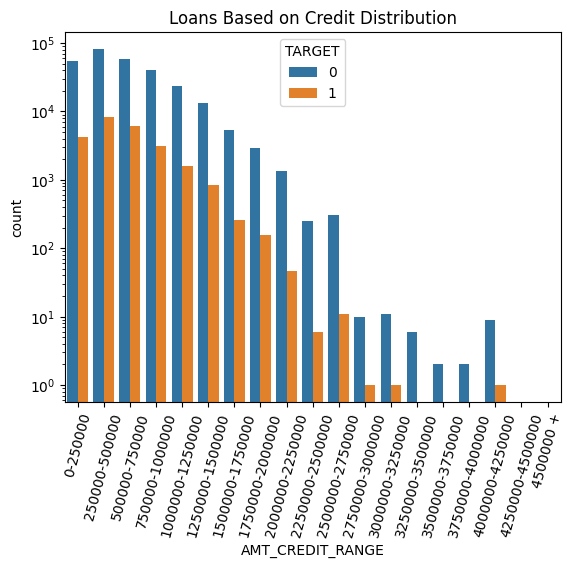

In [119]:
vert_plot(inp1,'AMT_CREDIT_RANGE','Loans Based on Credit Distribution',scale='log')

Customers whose credit is in the range 3000000 - 3750000 usually dont have difficulties in paying back their loans. Whereas customers whose credit is in the range 250000 - 500000 take the maximum number of loans and have the highest unsuccessful loan payments

In [120]:
inp2.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [121]:
inp2['AMT_CREDIT_PREV_RANGE']=pd.cut(inp1.AMT_CREDIT,bins=credit_bins,labels=credit_labels)

In [122]:
inp2.AMT_CREDIT_PREV_RANGE.value_counts(normalize=True).sort_values(ascending=False)

250000-500000      0.293106
500000-750000      0.211680
0-250000           0.192509
750000-1000000     0.140156
1000000-1250000    0.081543
1250000-1500000    0.046028
1500000-1750000    0.018348
1750000-2000000    0.010032
2000000-2250000    0.004592
2500000-2750000    0.001034
2250000-2500000    0.000833
3000000-3250000    0.000039
2750000-3000000    0.000036
4000000-4250000    0.000033
3250000-3500000    0.000020
3500000-3750000    0.000007
3750000-4000000    0.000007
4250000-4500000    0.000000
4500000 +          0.000000
Name: AMT_CREDIT_PREV_RANGE, dtype: float64

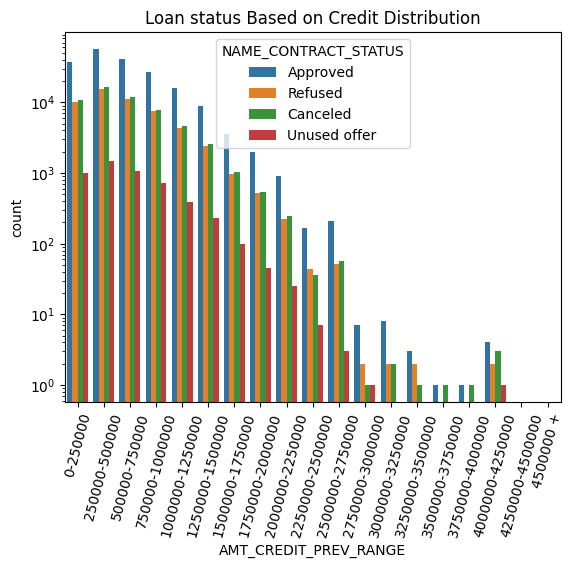

In [123]:
vert_plot(inp2,'AMT_CREDIT_PREV_RANGE','Loan status Based on Credit Distribution',scale='log',hue='NAME_CONTRACT_STATUS')

# Finding correlation

In [124]:
t0_correlation= inp1[inp1.TARGET==0].iloc[:,2:].corr()

In [125]:
t0_correlation

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH
CNT_CHILDREN,1.000000,0.027401,0.003088,0.020913,-0.000515,-0.024367,-0.245174,0.185783,-0.028745,0.878570,...,-0.002232,0.014142,-0.002155,-0.000431,0.000648,-0.001630,-0.010481,-0.007081,-0.042556,-0.336966
AMT_INCOME_TOTAL,0.027401,1.000000,0.342801,0.418954,0.349461,0.167850,-0.140392,0.064941,0.022896,0.034259,...,-0.027645,-0.027697,-0.027624,0.001417,0.007862,0.006234,0.061473,0.013125,0.029532,-0.062609
AMT_CREDIT,0.003088,0.342801,1.000000,0.771308,0.987253,0.100608,-0.070108,0.013479,-0.001466,0.064544,...,-0.019847,-0.000889,-0.022221,-0.003734,0.004408,-0.001884,0.054080,0.017765,-0.048861,0.047376
AMT_ANNUITY,0.020913,0.418954,0.771308,1.000000,0.776686,0.120992,-0.104982,0.039438,0.014110,0.075796,...,-0.022536,-0.012892,-0.023387,0.003148,0.002391,0.012680,0.038191,0.011246,-0.010878,-0.012265
AMT_GOODS_PRICE,-0.000515,0.349461,0.987253,0.776686,1.000000,0.103829,-0.068612,0.015919,-0.003652,0.062824,...,-0.021053,-0.000732,-0.023207,-0.003117,0.004820,-0.001598,0.055861,0.018157,-0.051270,0.044567
REGION_POPULATION_RELATIVE,-0.024367,0.167850,0.100608,0.120992,0.103829,1.000000,-0.007194,-0.052091,-0.001074,-0.023431,...,0.005902,-0.011613,0.002205,-0.002264,0.001970,-0.002478,0.078628,-0.001015,0.001761,0.025256
DAYS_EMPLOYED,-0.245174,-0.140392,-0.070108,-0.104982,-0.068612,-0.007194,1.000000,-0.214511,-0.276665,-0.238299,...,0.019399,0.007462,0.016409,-0.004460,-0.000874,0.002222,-0.034886,0.015116,0.052177,0.626116
DAYS_REGISTRATION,0.185783,0.064941,0.013479,0.039438,0.015919,-0.052091,-0.214511,1.000000,0.100234,0.175622,...,0.001195,0.008231,0.002630,-0.002729,-0.000035,-0.001430,-0.011867,-0.000527,-0.026651,-0.333143
DAYS_ID_PUBLISH,-0.028745,0.022896,-0.001466,0.014110,-0.003652,-0.001074,-0.276665,0.100234,1.000000,-0.020455,...,0.000381,-0.012826,0.002464,0.004797,-0.000198,-0.001655,-0.008715,-0.007074,-0.035642,-0.271313
CNT_FAM_MEMBERS,0.878570,0.034259,0.064544,0.075796,0.062824,-0.023431,-0.238299,0.175622,-0.020455,1.000000,...,-0.004046,0.023211,-0.005521,0.000779,0.000181,-0.000342,-0.007833,-0.004154,-0.030283,-0.285822


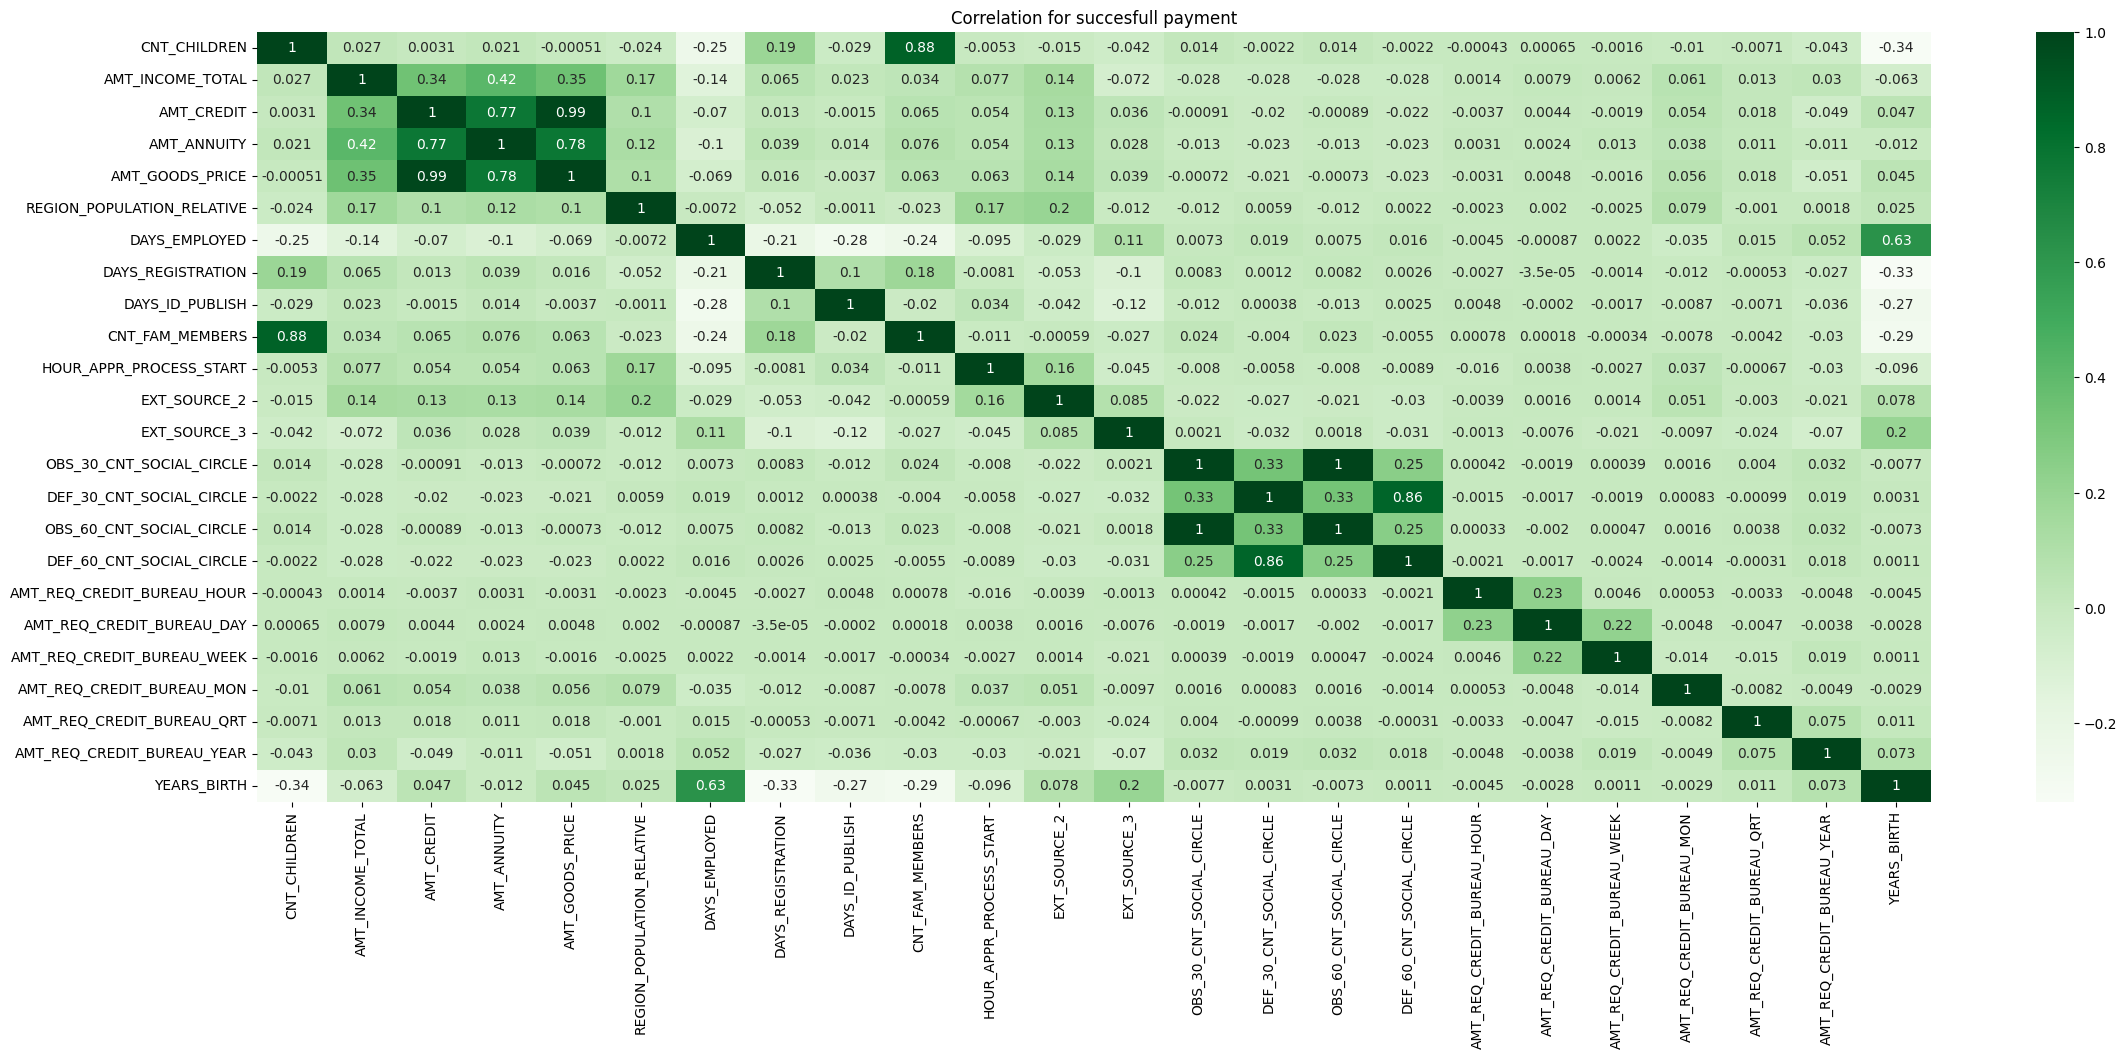

In [126]:
plt.figure(figsize=(27,10))
plt.title('Correlation for succesfull payment')
sns.heatmap(t0_correlation,annot=True,cmap='Greens')
plt.show()

From above we can observe that- 

1) There is a high correlation between price of the good and the credit amount.

2) There is a high correlation between number of family members and number of children they have

3) There is a high correlation between number of days the customer has been employed and their age

4) There is a high correlation between the good's price and the loan annuity

5) There is a high correlation between the income of customer and loan annuity

In [127]:
t1_correlation= inp1[inp1.TARGET==1].iloc[:,2:].corr()
t1_correlation

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH
CNT_CHILDREN,1.000000,0.004796,-0.001675,0.031257,-0.008112,-0.031975,-0.192864,0.149154,-0.032299,0.885484,...,0.001448,0.025180,-0.005106,-0.000382,-0.013004,-0.011792,-0.012583,-0.018174,-0.035427,-0.259109
AMT_INCOME_TOTAL,0.004796,1.000000,0.038131,0.046421,0.037583,0.009135,-0.014977,0.000158,-0.004215,0.006654,...,-0.005186,-0.004616,-0.004866,0.000656,-0.000272,0.000018,0.004114,-0.001133,0.001752,-0.003096
AMT_CREDIT,-0.001675,0.038131,1.000000,0.752195,0.983103,0.069161,0.001930,-0.025854,-0.052329,0.051224,...,-0.025979,0.019487,-0.030880,-0.005981,0.003008,0.007650,0.055038,-0.017467,-0.035719,0.135316
AMT_ANNUITY,0.031257,0.046421,0.752195,1.000000,0.752699,0.071690,-0.081207,0.034279,-0.016767,0.075711,...,-0.022394,0.005500,-0.027495,0.014039,-0.000294,0.031242,0.053413,-0.010205,-0.013841,0.014303
AMT_GOODS_PRICE,-0.008112,0.037583,0.983103,0.752699,1.000000,0.076049,0.006642,-0.025679,-0.056086,0.047388,...,-0.021783,0.020385,-0.026179,-0.004496,0.004280,0.007980,0.058558,-0.016024,-0.037848,0.135810
REGION_POPULATION_RELATIVE,-0.031975,0.009135,0.069161,0.071690,0.076049,1.000000,0.015532,-0.056222,-0.015537,-0.030163,...,0.025865,0.006793,0.018231,-0.001238,-0.005483,0.002904,0.071329,-0.007299,0.000602,0.048190
DAYS_EMPLOYED,-0.192864,-0.014977,0.001930,-0.081207,0.006642,0.015532,1.000000,-0.192455,-0.229090,-0.186515,...,0.003191,-0.008305,0.005391,-0.007914,0.021520,0.014952,-0.025091,0.014426,0.035786,0.582185
DAYS_REGISTRATION,0.149154,0.000158,-0.025854,0.034279,-0.025679,-0.056222,-0.192455,1.000000,0.096833,0.145828,...,0.010299,0.014522,0.009157,-0.004984,-0.008367,0.003130,0.004876,-0.012457,-0.013321,-0.289114
DAYS_ID_PUBLISH,-0.032299,-0.004215,-0.052329,-0.016767,-0.056086,-0.015537,-0.229090,0.096833,1.000000,-0.031785,...,0.007602,-0.019594,0.004946,0.003837,-0.012654,0.003047,-0.014166,0.007995,-0.041730,-0.252863
CNT_FAM_MEMBERS,0.885484,0.006654,0.051224,0.075711,0.047388,-0.030163,-0.186515,0.145828,-0.031785,1.000000,...,0.007098,0.043308,-0.000777,-0.000798,-0.018203,-0.010800,-0.009169,-0.012842,-0.012684,-0.203267


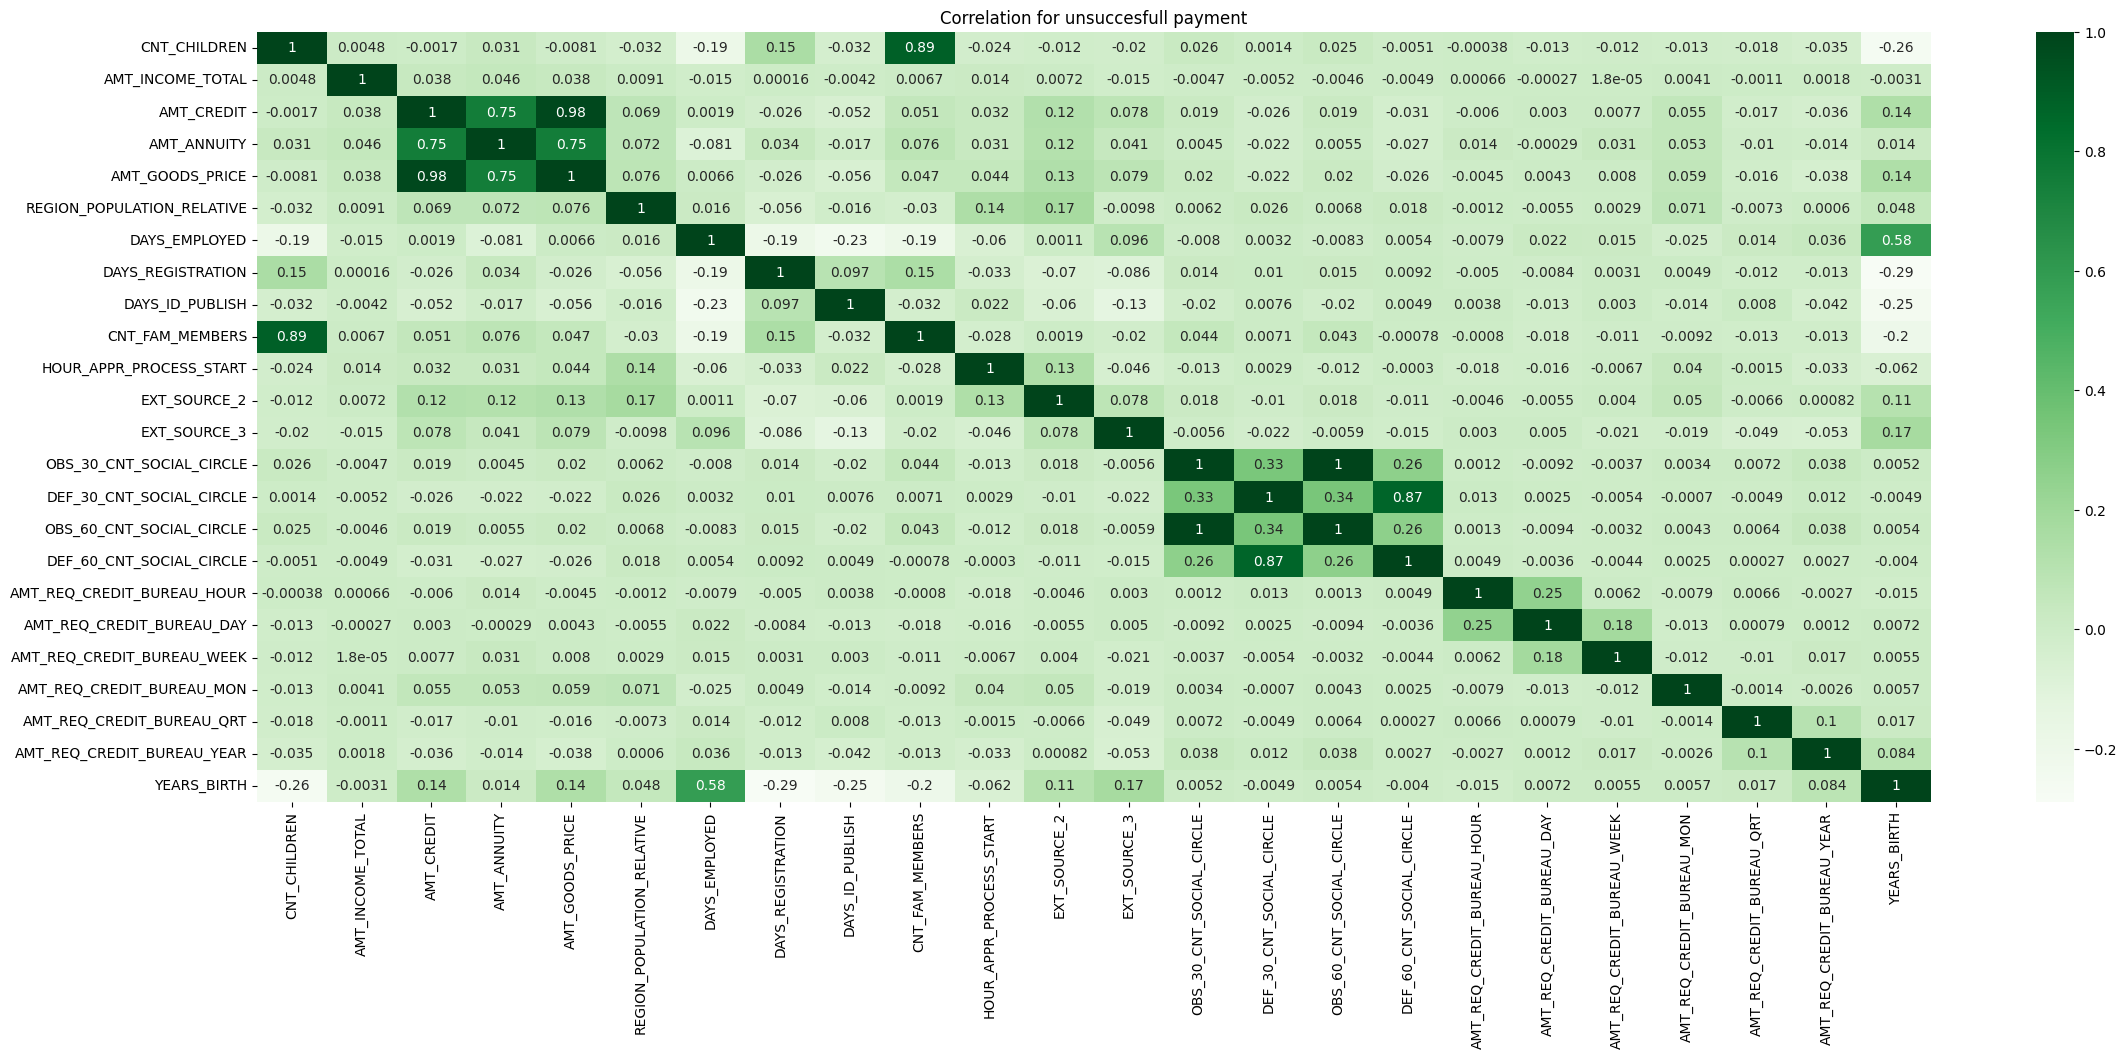

In [128]:
plt.figure(figsize=(27,10))
plt.title('Correlation for unsuccesfull payment')
sns.heatmap(t1_correlation,annot=True,cmap='Greens')
plt.show()

From above we can observe that- 

1) There is a high correlation between price of the good and the credit amount.

2) There is a high correlation between number of family members and number of children they have

3) There is a high correlation between number of days the customer has been employed and their age

4) There is a high correlation between the good's price and the loan annuity

## Checking for outliers and analysing previous application data

In [129]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 24 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1670214 non-null  int64   
 1   NAME_CONTRACT_TYPE           1670214 non-null  object  
 2   AMT_ANNUITY                  1297979 non-null  float64 
 3   AMT_APPLICATION              1670214 non-null  float64 
 4   AMT_CREDIT                   1670213 non-null  float64 
 5   AMT_GOODS_PRICE              1284699 non-null  float64 
 6   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object  
 7   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 8   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object  
 9   NAME_CONTRACT_STATUS         1670214 non-null  object  
 10  DAYS_DECISION                1670214 non-null  int64   
 11  NAME_PAYMENT_TYPE            1670214 non-null  object  
 12  CODE_REJECT_REASON          

[]

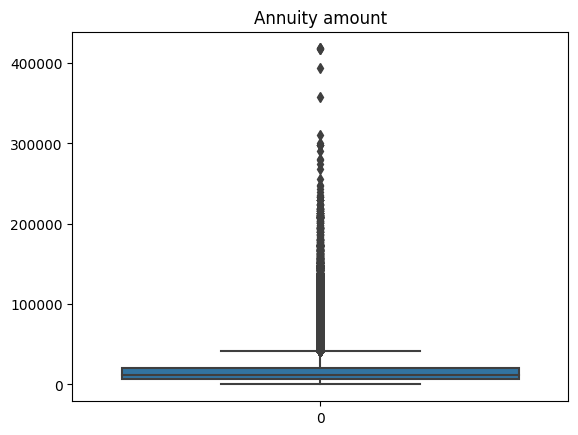

In [130]:
sns.boxplot(inp2.AMT_ANNUITY)
plt.title('Annuity amount')
plt.plot()

There are outliers present in AMT_ANNUITY column

[]

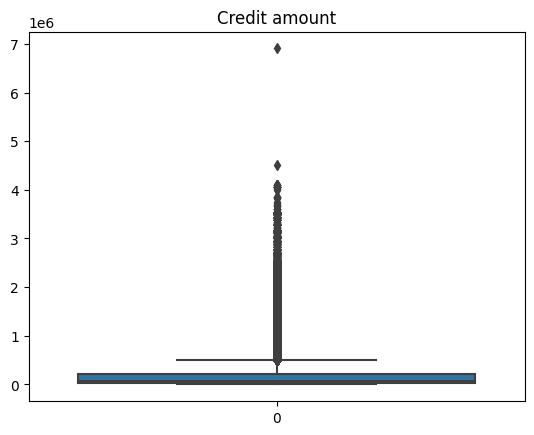

In [131]:
sns.boxplot(inp2.AMT_CREDIT)
plt.title('Credit amount')
plt.plot()

There are outliers present in the AMT_CREDIT column

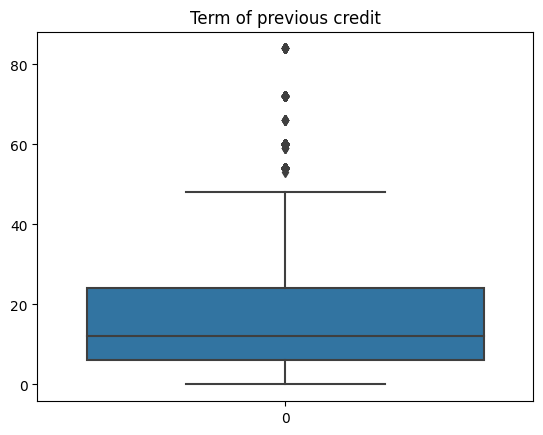

In [132]:
sns.boxplot(inp2.CNT_PAYMENT)
plt.title('Term of previous credit')
plt.show()

There are outliers present in the CNT_PAYMENT column

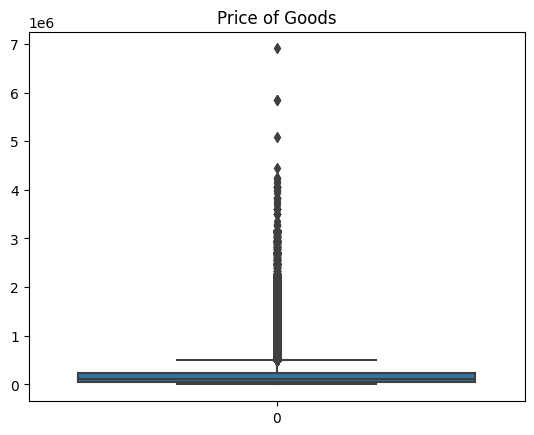

In [133]:
sns.boxplot(inp2.AMT_GOODS_PRICE)
plt.title('Price of Goods')
plt.show()

There are outliers present in AMT_GOODS_PRICE column

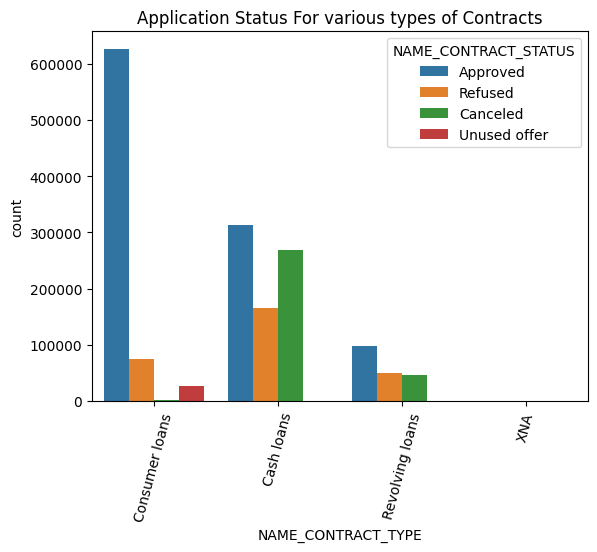

In [134]:
vert_plot(inp2,'NAME_CONTRACT_TYPE','Application Status For various types of Contracts',hue='NAME_CONTRACT_STATUS')

Maximum number of approved loans are consumer loans

Whereas most cancelled and refused loans are cash loans

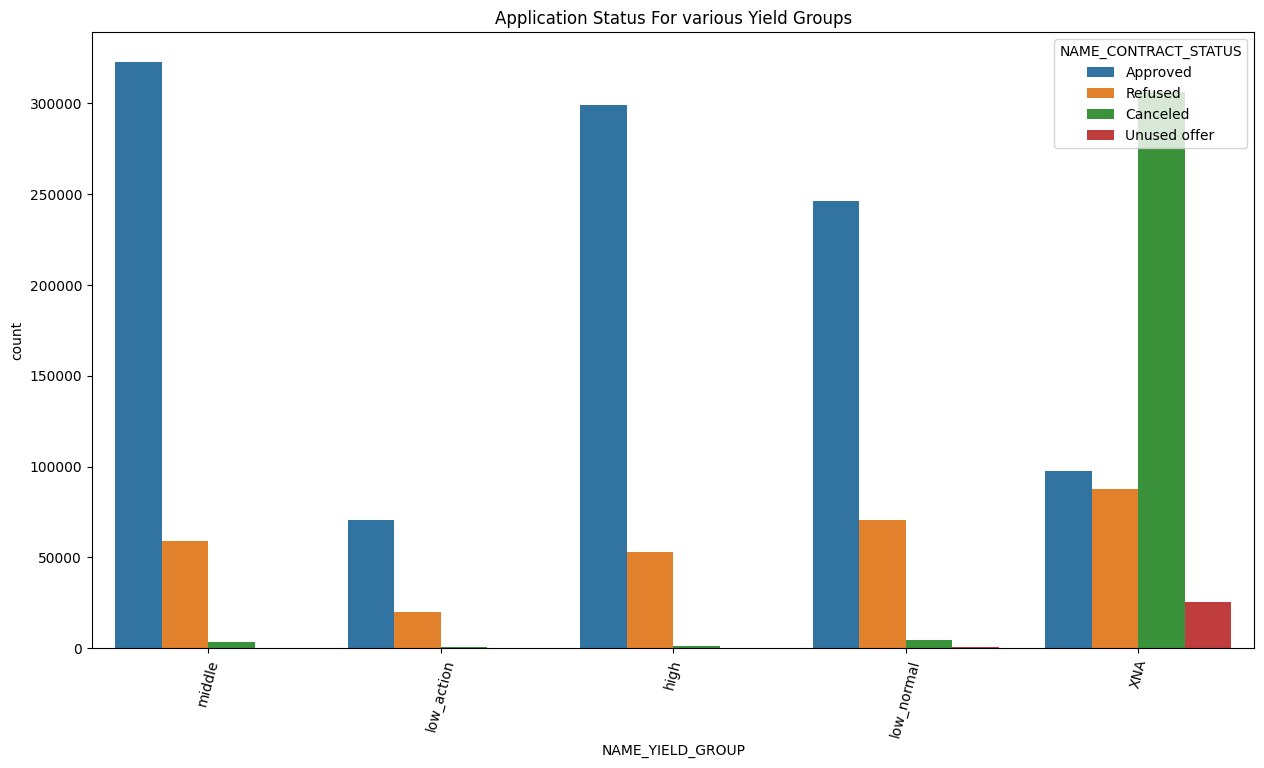

In [135]:
plt.figure(figsize=(15,8))
vert_plot(inp2,'NAME_YIELD_GROUP','Application Status For various Yield Groups',hue='NAME_CONTRACT_STATUS')

Most of the approved loans had middle interest rate 

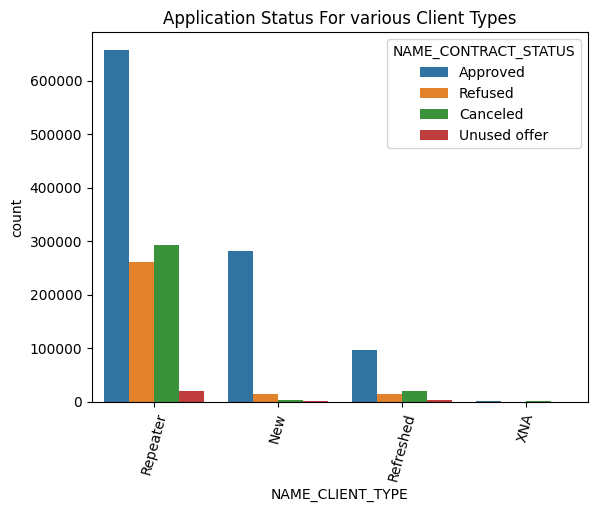

In [136]:
vert_plot(inp2,'NAME_CLIENT_TYPE','Application Status For various Client Types',hue='NAME_CONTRACT_STATUS')

Most of the approved loans are of customers who are repeaters

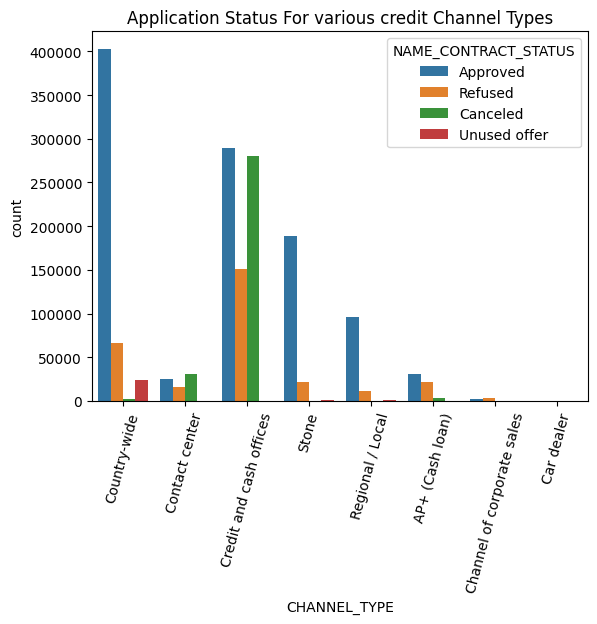

In [137]:
vert_plot(inp2,'CHANNEL_TYPE','Application Status For various credit Channel Types',hue='NAME_CONTRACT_STATUS')

From above we can observe that-

1) The maximum number of loans were approved by country-wide credit channels

2) The maximum number of loans were cancelled by credit and cash offices

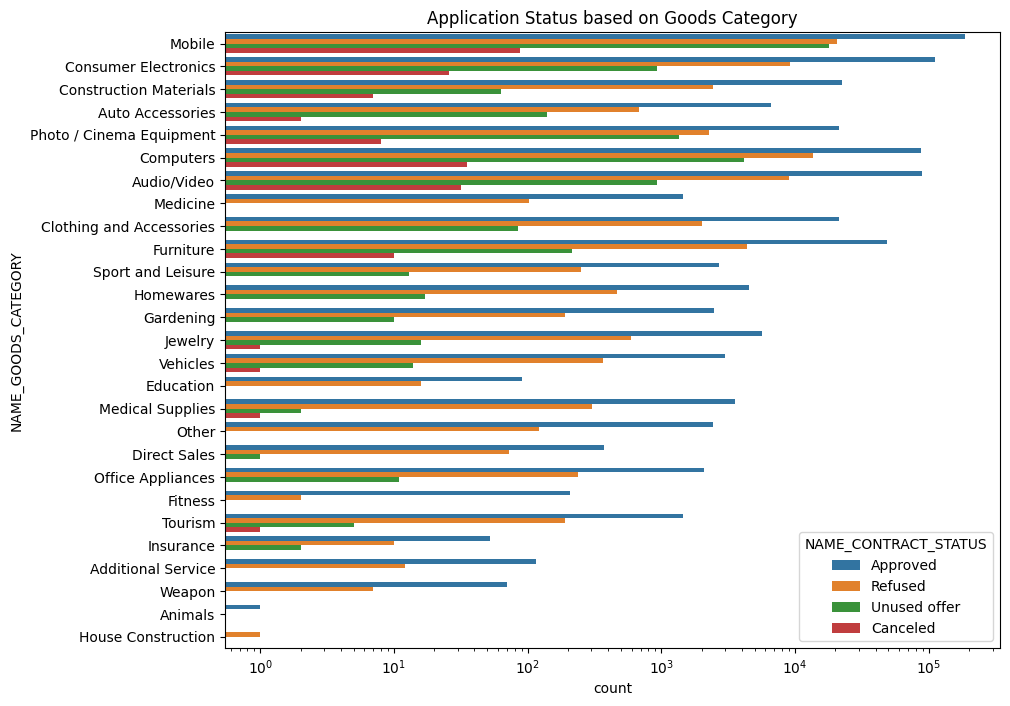

In [138]:
plt.figure(figsize=(10,8))
h_plot(inp2[~(inp2.NAME_GOODS_CATEGORY=='XNA')],'NAME_GOODS_CATEGORY','Application Status based on Goods Category'
       ,hue='NAME_CONTRACT_STATUS',scale='log')

From above we can observe that- 

1) Majority of loans were approved for purchase of mobile

2) Very few poeple applied for a loan for animals

3) Alot of loans for mobile, consumer electronics, computers and audio/video are refused

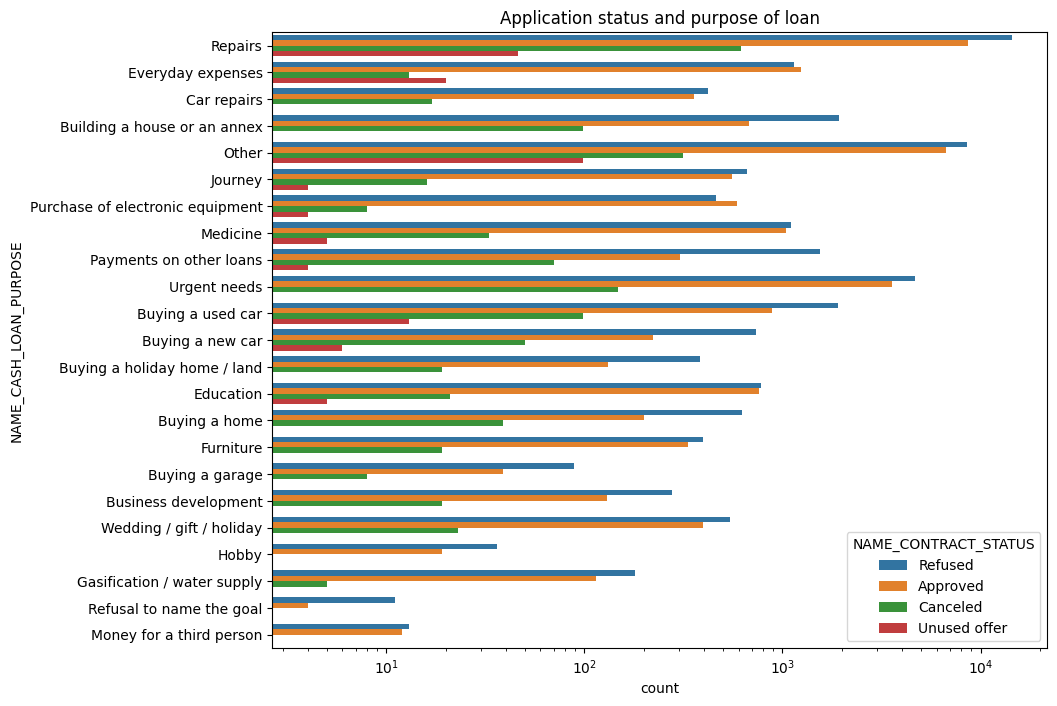

In [139]:
plt.figure(figsize=(10,8))
h_plot(inp2[~((inp2.NAME_CASH_LOAN_PURPOSE=='XAP')|(inp2.NAME_CASH_LOAN_PURPOSE=='XNA'))],'NAME_CASH_LOAN_PURPOSE',
      'Application status and purpose of loan',hue='NAME_CONTRACT_STATUS',scale='log')

From above we can observe- 

1) The maximum number refused loans were for repairs

2) Majority of loans were taken for repairs

3) The highest number of approved loans were of repair and other category

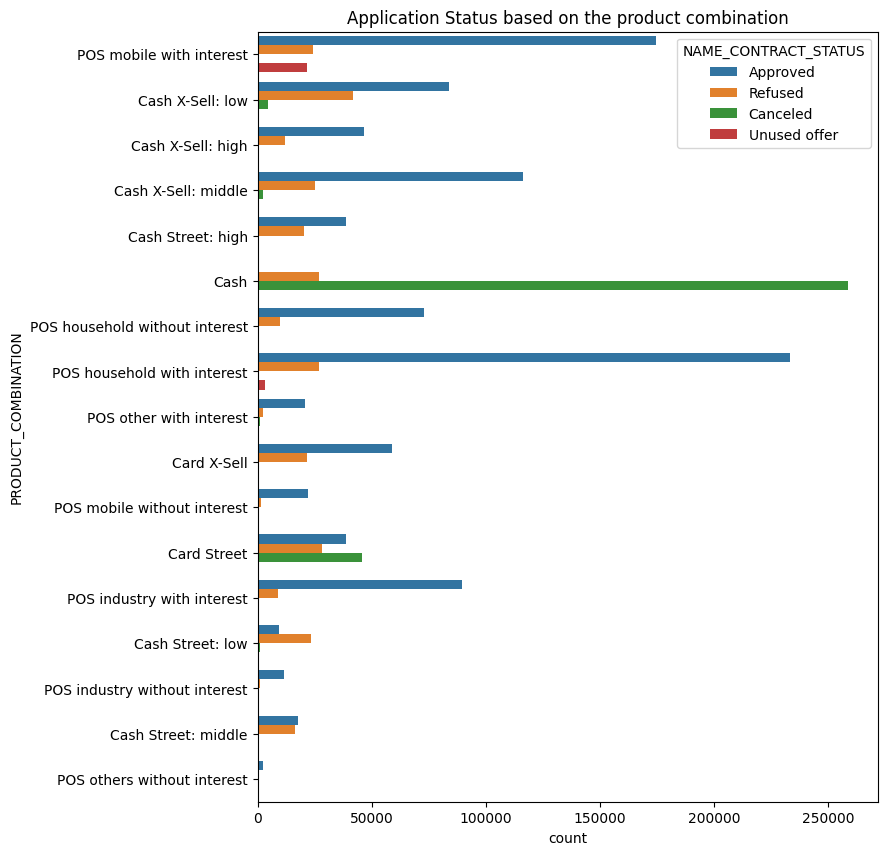

In [140]:
plt.figure(figsize=(8,10))
h_plot(inp2,'PRODUCT_COMBINATION','Application Status based on the product combination',hue='NAME_CONTRACT_STATUS')

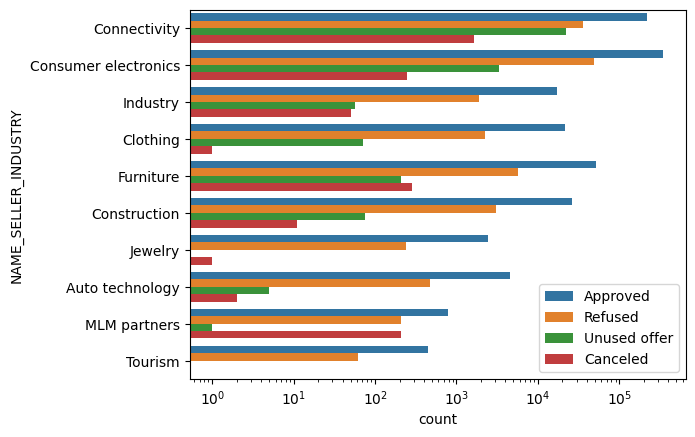

In [141]:
sns.countplot(data=inp2[~(inp2.NAME_SELLER_INDUSTRY=='XNA')],y='NAME_SELLER_INDUSTRY',hue='NAME_CONTRACT_STATUS')
plt.legend(loc='lower right')
plt.xscale('log')
plt.show()

Highest number of loans that are approved were for consumer electronics

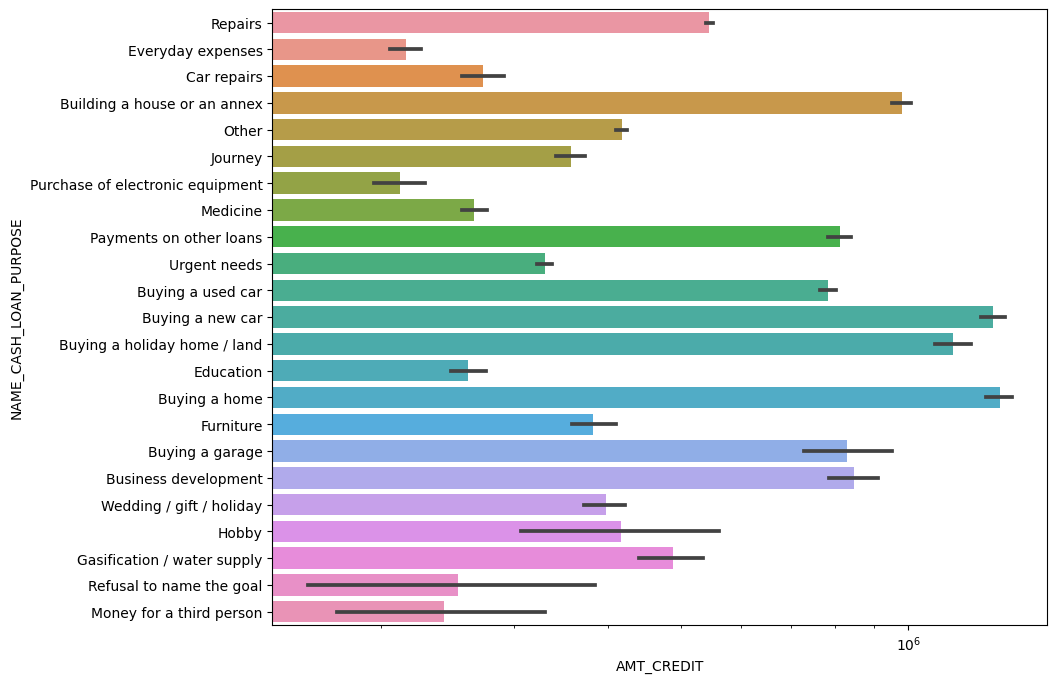

In [142]:
plt.figure(figsize=(10,8))
sns.barplot(data=inp2[~((inp2.NAME_CASH_LOAN_PURPOSE=='XAP')|(inp2.NAME_CASH_LOAN_PURPOSE=='XNA'))],
              y='NAME_CASH_LOAN_PURPOSE',x='AMT_CREDIT')
plt.xscale('log')

From above we can observe the following-

1) Least credit was taken for everyday expenses and purchase of electronic equipment

2) The highest amount of credit was taken for buying a new home and car

# Merging both the datasets 

In [143]:
merged_df = pd.merge(left=inp1, right=inp2,how='inner', on='SK_ID_CURR',suffixes='_x')

In [144]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMT_CREDIT_PREV_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,NaN
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,NaN
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,NaN
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,NaN


In [145]:
merged_df.shape

(1413646, 62)

In [146]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413646 entries, 0 to 1413645
Data columns (total 62 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413646 non-null  int64   
 1   TARGET                       1413646 non-null  int64   
 2   NAME_CONTRACT_TYPE_          1413646 non-null  object  
 3   CODE_GENDER                  1413646 non-null  object  
 4   FLAG_OWN_CAR                 1413646 non-null  object  
 5   FLAG_OWN_REALTY              1413646 non-null  object  
 6   CNT_CHILDREN                 1413646 non-null  int64   
 7   AMT_INCOME_TOTAL             1413646 non-null  float64 
 8   AMT_CREDIT_                  1413646 non-null  float64 
 9   AMT_ANNUITY_                 1413553 non-null  float64 
 10  AMT_GOODS_PRICE_             1412438 non-null  float64 
 11  NAME_TYPE_SUITE              1410120 non-null  object  
 12  NAME_INCOME_TYPE            

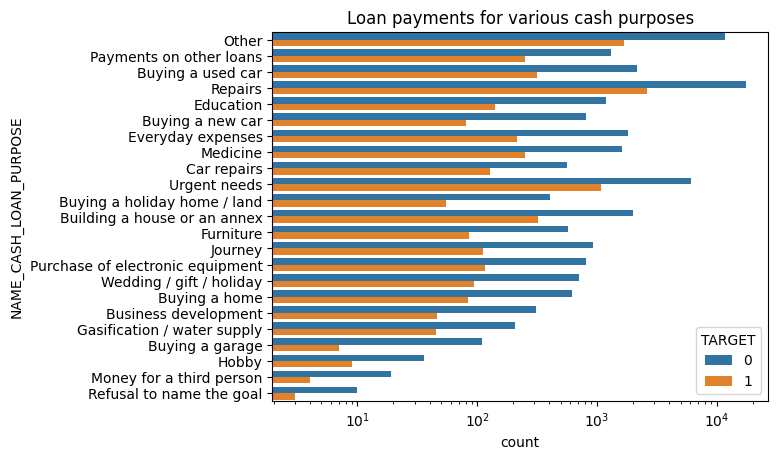

In [152]:
h_plot(merged_df[~((merged_df.NAME_CASH_LOAN_PURPOSE=='XAP')|(merged_df.NAME_CASH_LOAN_PURPOSE=='XNA'))],
        'NAME_CASH_LOAN_PURPOSE','Loan payments for various cash purposes',hue='TARGET',scale='log')

From above we can observe that-

1) Maximum number of loans are being taken for the purpose of repairs

2) Repairs also have the highest number of defaulters as compared to others

3) Customers who have taken a loan for the purpose of buying a garage usually don't face any difficulty in paying back the loan

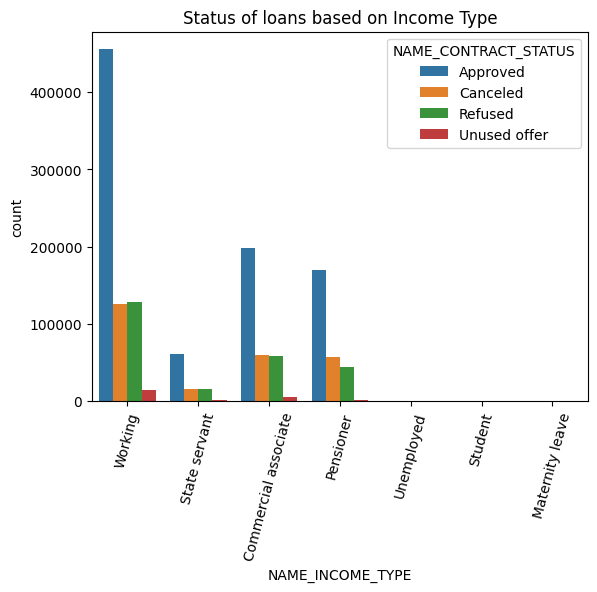

In [148]:
vert_plot(merged_df,'NAME_INCOME_TYPE','Status of loans based on Income Type',hue='NAME_CONTRACT_STATUS')

From above we can observe that -

1) Working professionals have the highest number of approved loans followed by commercial associates and pensioners

2) Customers who are either unemployed, students or on maternity leave have very less number of loans

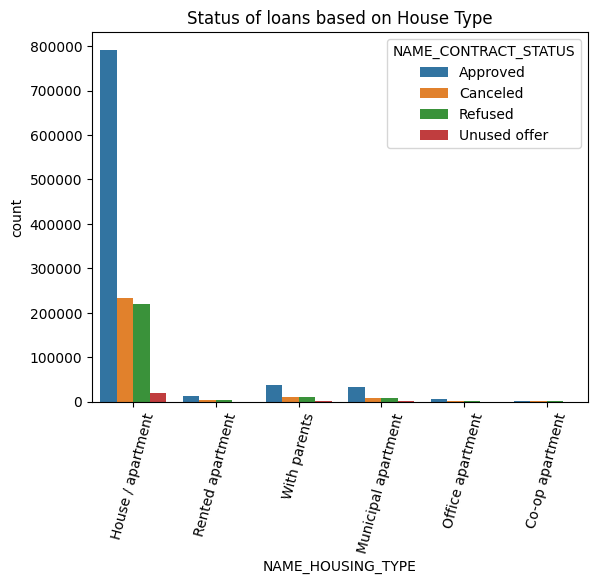

In [149]:
vert_plot(merged_df,'NAME_HOUSING_TYPE','Status of loans based on House Type',hue='NAME_CONTRACT_STATUS')

Customers who live in a house/apartment of theor own have the highest number of approved loans

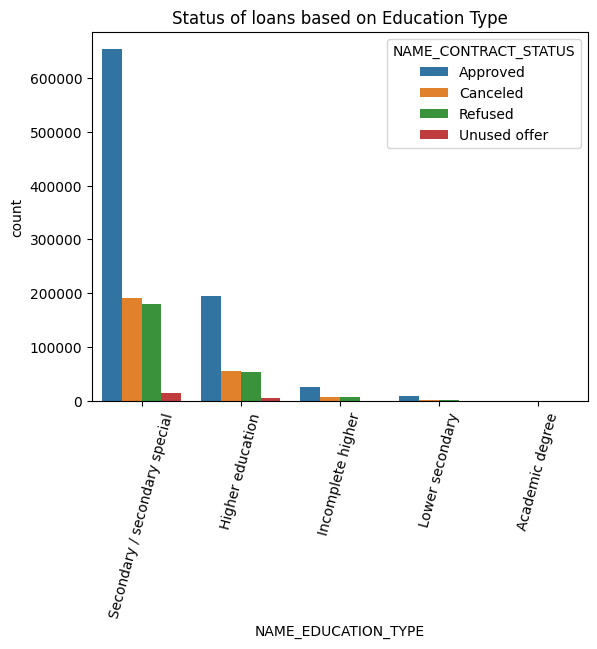

In [150]:
vert_plot(merged_df,'NAME_EDUCATION_TYPE','Status of loans based on Education Type',hue='NAME_CONTRACT_STATUS')

Customers who have received a secondary/seconday special education have the highest number of approved loans followed by the customers who have some higher education

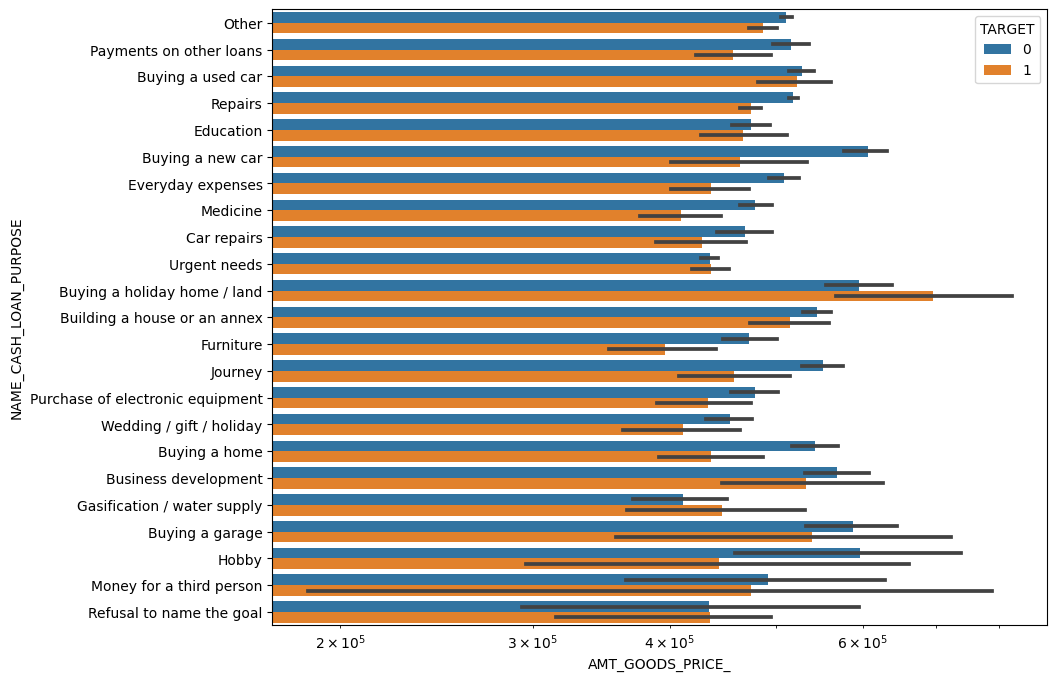

In [151]:
plt.figure(figsize=(10,8))
sns.barplot(data=merged_df[~((merged_df.NAME_CASH_LOAN_PURPOSE=='XAP')|(merged_df.NAME_CASH_LOAN_PURPOSE=='XNA'))],
              y='NAME_CASH_LOAN_PURPOSE',x='AMT_GOODS_PRICE_',hue='TARGET')
plt.xscale('log')

From above we can observe the following-

1) Customers who took a loan for buying a new car had the most number of successfull loan payments

2) Customers who took loan for buying a holiday home/land had the most number of unsuccessfull loan payments

# Conclusion-

Banks should avoid giving loans for the purpose of buying a holiday home/land as they have high unsuccessful rate 

Banks should give more loans to students and businessman as they have the least unsuccessful payments

Banks should give more loans for buying house and cars as the credit amount taken for them is high and also the successful payment percentage is decent
